# 🚗Car Price Prediction Multiple Linear Regression

In this notebook, we're going to go through an example machine learning project with the goal of predicting the car price prediction.

Since we're trying to predict a number, this kind of problem is known as a **regression problem**.

# Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

1. Which variables are significant in predicting the price of a car
2. How well those variables describe the price of a car
3. Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America  
   market.

# Business Goal

We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

Objective:- Car Price Prediction using Machine Learning.

Description

💡 The price of a car depends on a lot of factors like the goodwill of the brand of the car,features of the car, horsepower and the mileage it gives and many more.
💡 Car price prediction is one of the major research areas in machine learning.
💡 In this assignment we have to train a machine learning model which will predict the price of cars using the given features of car.

## Importing Libraries

This script imports necessary libraries and sets up configurations for car price prediction using regression models.

Essential Libraries

1. numpy	Supports numerical operations (e.g., arrays, matrices)
2. pandas	Handles data manipulation using DataFrames
3. matplotlib.pyplot	Used for data visualization (graphs, plots)
4. scipy.stats	Provides statistical tools (e.g., normality tests, distributions)
5. seaborn	Enhances visualizations with statistical plots
6. pylab	Supports MATLAB-like plotting functions
7. warnings	Suppresses unnecessary warnings

Configuring Visualization & Display Settings

1. warnings.filterwarnings("ignore")  # Suppresses warning messages
2. %matplotlib inline  # Displays plots inline (only for Jupyter Notebooks)
3. sns.set(style="darkgrid", font_scale=1.5)  # Sets Seaborn theme & font size
4. pd.set_option("display.max.columns", None)  # Displays all columns in DataFrames
5. pd.set_option("display.max.rows", None)  # Displays all rows in DataFrames

Purpose:

✔ Hides warning messages to keep output clean
✔ Ensures plots appear inside the notebook
✔ Enhances readability with a dark grid style & larger font
✔ Ensures large datasets are fully visible

Importing Regression Models

1. LinearRegression	Basic linear regression model
2. DecisionTreeRegressor	A tree-based model that splits data into rules
3. RandomForestRegressor	An ensemble of decision trees to reduce overfitting
4. GradientBoostingRegressor	Boosting algorithm that builds trees sequentially
5. AdaBoostRegressor	Another boosting method that assigns more weight to difficult cases
6. XGBRegressor	XGBoost, a powerful gradient boosting library
7. CatBoostRegressor	CatBoost, optimized for categorical data
8. LGBMRegressor	LightGBM, a fast boosting model for large datasets

Importing Model Training & Evaluation Tools

1. train_test_split	Splits data into training & testing sets
2. r2_score	Measures model accuracy (R² value)
3. StandardScaler	Standardizes numerical features (mean=0, std=1)


In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pylab
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid",font_scale=1.5)
pd.set_option("display.max.columns",None)
pd.set_option("display.max.rows",None)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor


from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

## Loading Datasets

In [87]:
df = pd.read_csv("C:\\Viji_DS_GT\\ML\\CSV Files\\CarPrice_Assignment.csv")


## Displays the first 5 rows of the dataset.

In [88]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Displays the last 5 rows of the dataset.

In [89]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


## Returns the number of rows and columns in the dataset. Here, it is 205 rows and 26 columns

In [90]:
df.shape

(205, 26)

## Provides a summary of the dataset, including:
   Column names, Data types (int, float, object), Number of non-null values

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## Provides descriptive statistics for numerical columns

In [92]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Counts the number of missing values per column and converts it into a dataframe and renames the column.

In [93]:
df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})

,Total No. of Missing Values
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


## Checks for duplicate rows in the dataset.

In [94]:
print("Duplicate Values =",df.duplicated().sum())

Duplicate Values = 0


## Selects and displays only categorical columns (data type: object) from the dataset.

In [95]:
df.select_dtypes(include="object").head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


## Selects and displays only numerical columns (int and float types).

In [96]:
df.select_dtypes(include=["int","float"]).head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [97]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Extracting CompanyName from CarName

1. The CarName column contains both the car's company name and car name
2. This line extracts only the company/brand name ("toyota") using .split(" ")[0] (splitting the name and taking the first word).
3. The extracted CompanyName is then inserted as a new column at position 2 in the dataframe.

In [98]:
Company_Name = df["CarName"].apply(lambda x: x.split(" ")[0])
df.insert(2,"CompanyName",Company_Name)

# Now we can drop the CarName Feature.
df.drop(columns=["CarName"],inplace=True)

## checking company name column

In [99]:
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [100]:
## Checking the Unique Car Company Names

In [101]:
df["CompanyName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

## Observation

There seems to be some spelling error in the CompanyName column.

maxda = mazda
Nissan = nissan
porsche = porcshce
toyota = toyouta
vokswagen = volkswagen = vw

So we have to replace those incorrect car company names wit correct company's name.

## Creating a Function to Replace the Values.

In [102]:
def replace(a,b):
    df["CompanyName"].replace(a,b,inplace=True)

replace('maxda','mazda')
replace('Nissan', 'nissan')
replace('porcshce','porsche')
replace('toyouta','toyota')
replace('vokswagen','volkswagen')
replace('vw','volkswagen')

## This prints all unique company names after correction.

In [103]:
df["CompanyName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

## Observation

1. Now all the car company name seems correct.So we don't need to do any more cleaning.
2. Now we can go to next step which is exploratory data analysis.

## Exploratory Data Analysis (EDA)

1. Visualizing our Target Feature.

## Car Price Distribution 

1. PlotPlots a histogram to show how car prices are distributed.
2. kde=True adds a smooth density curve to visualize the probability distribution.
3. Helps identify whether prices are normally distributed or skewed.

## Car Price Spread (Box Plot)
1. Plots a boxplot of car prices.
2. Shows median, quartiles, and outliers.
3. Helps detect outliers that might affect model performance.


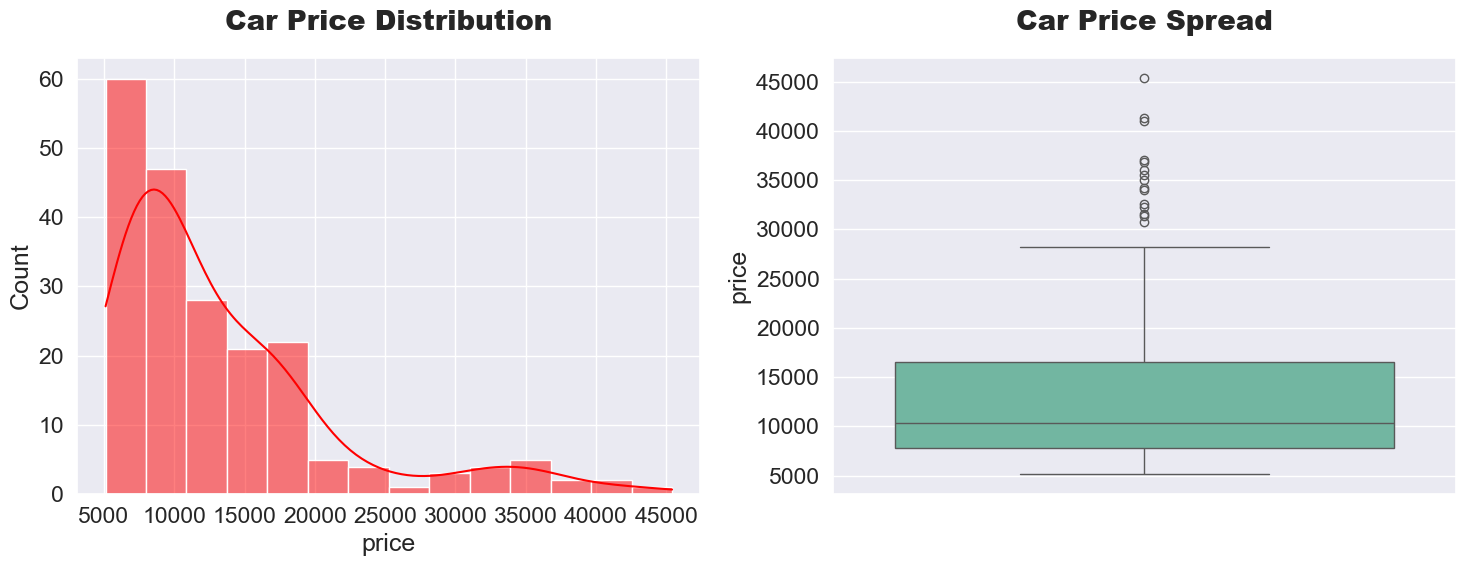

In [104]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(df["price"],color="red",kde=True)
plt.title("Car Price Distribution",fontweight="black",pad=20,fontsize=20)

plt.subplot(1,2,2)
sns.boxplot(y=df["price"],palette="Set2")
plt.title("Car Price Spread",fontweight="black",pad=20,fontsize=20)
plt.tight_layout()
plt.show()

## Observations

1️⃣ Car Price Distribution (Left Plot)

Right-skewed distribution → Most car prices are below $20,000, but some reach above $40,000.
This suggests we might need log transformation to make the data more normal.

2️⃣ Car Price Spread (Right Plot)

Several outliers above $30,000.
The whiskers (lines) extend to ~25,000, but beyond that, there are many outliers.
Outliers might affect the model's performance.

2. Visualizing Total No. of cars sold by different company.

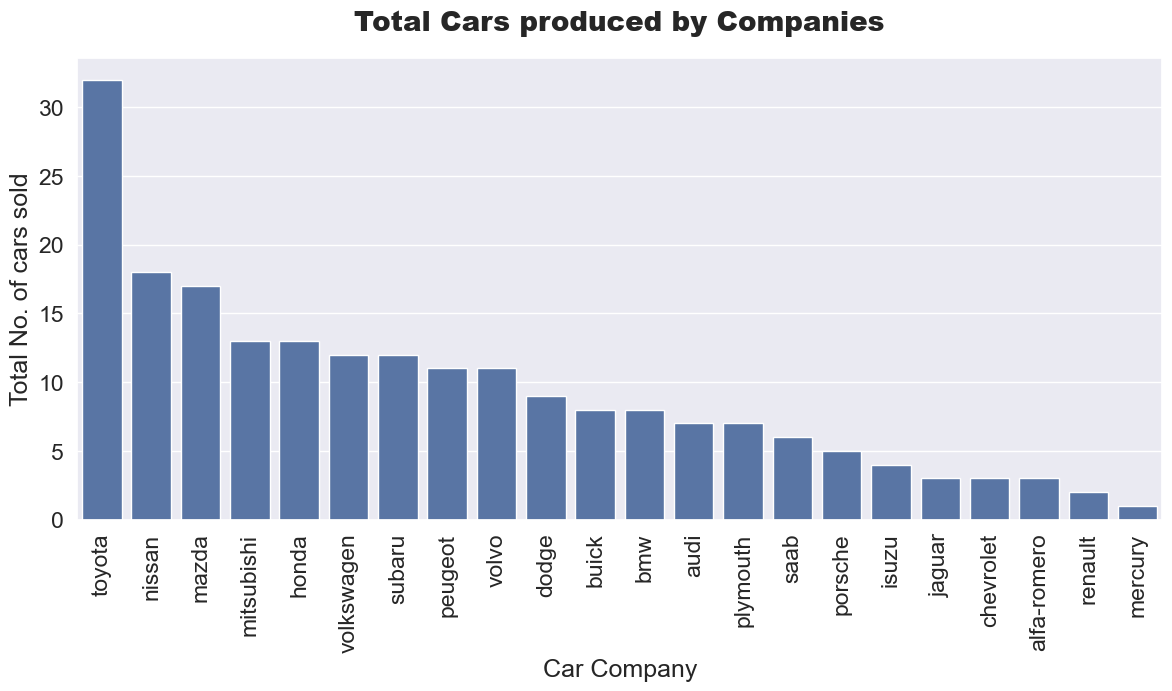

In [105]:
plt.figure(figsize=(14,6))
counts = df["CompanyName"].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xlabel("Car Company")
plt.ylabel("Total No. of cars sold")
plt.title("Total Cars produced by Companies", pad=20, fontweight="black", fontsize=20)
plt.xticks(rotation=90)
plt.show()

In [106]:
df[df["CompanyName"]=="mercury"]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
75,76,1,mercury,gas,turbo,two,hatchback,rwd,front,102.7,178.4,68.0,54.8,2910,ohc,four,140,mpfi,3.78,3.12,8.0,175,5000,19,24,16503.0


In [107]:
df[df["CompanyName"]=="renault"]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
130,131,0,renault,gas,std,four,wagon,fwd,front,96.1,181.5,66.5,55.2,2579,ohc,four,132,mpfi,3.46,3.9,8.7,90,5100,23,31,9295.0
131,132,2,renault,gas,std,two,hatchback,fwd,front,96.1,176.8,66.6,50.5,2460,ohc,four,132,mpfi,3.46,3.9,8.7,90,5100,23,31,9895.0


## Insights

1. Toyota company has sold the highest number of cars.
2. So we can say that Toyota is kind of customers most favoured company.
3. Mercury , renault are having very low data-points. So we can't make any inference of least sold car companies.

3. Visualizing Car Company w.r.t Price

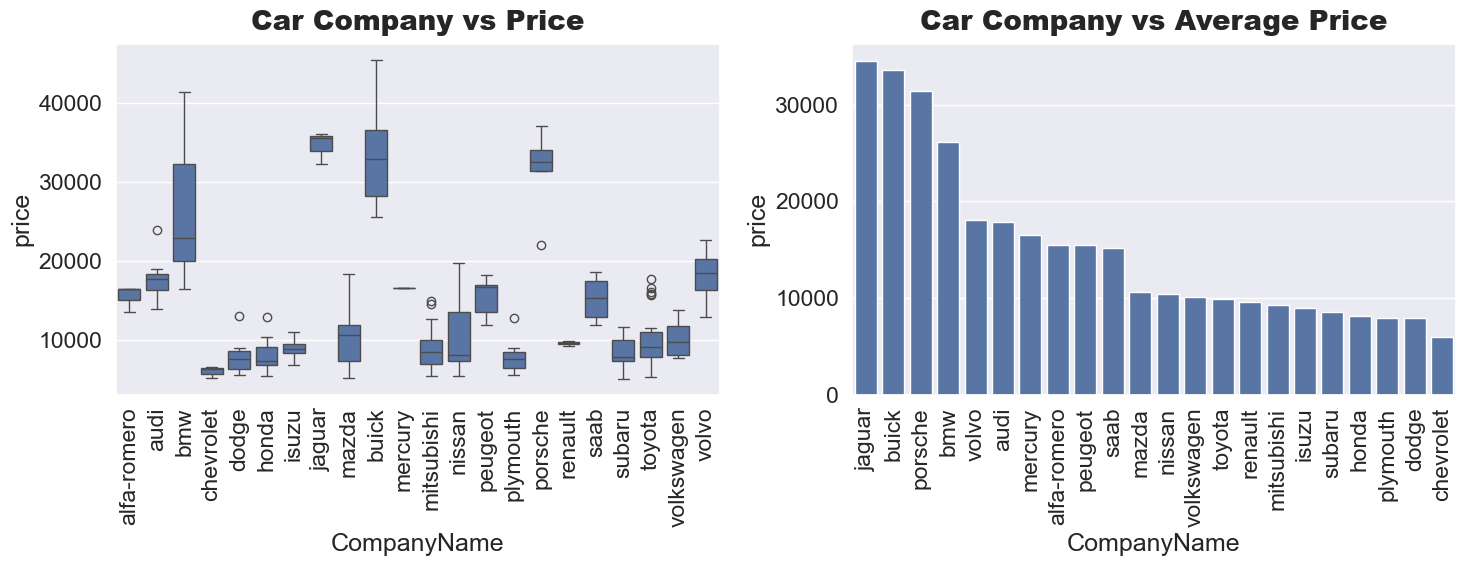

In [108]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.boxplot(x="CompanyName",y="price",data=df)
plt.xticks(rotation=90)
plt.title("Car Company vs Price", pad=10, fontweight="black", fontsize=20)

plt.subplot(1,2,2)
x = pd.DataFrame(df.groupby("CompanyName")["price"].mean().sort_values(ascending=False))
sns.barplot(x=x.index,y="price",data=x) 
plt.xticks(rotation=90)
plt.title("Car Company vs Average Price", pad=10, fontweight="black", fontsize=20)
plt.tight_layout()
plt.show()

## Insights

1️⃣ Left Plot: Car Company vs Price (Boxplot)

1. Jaguar, Buick, Porsche, BMW, and Volvo have the highest-priced cars.
2. Chevrolet, Dodge, and Plymouth have the lowest-priced cars.
3. Some companies (BMW, Jaguar, Porsche) have high price variation, while others (Chevrolet, Dodge) have a small range.

2️⃣ Right Plot: Car Company vs Average Price (Bar Chart)

1. Jaguar has the highest average price, followed by Buick, Porsche, BMW, and Volvo.
2. Chevrolet has the lowest average price, indicating it produces more budget-friendly cars.
3. This tells us that the company name is a significant feature in predicting car prices.

4. Visualizing Car Fuel Type Feature.

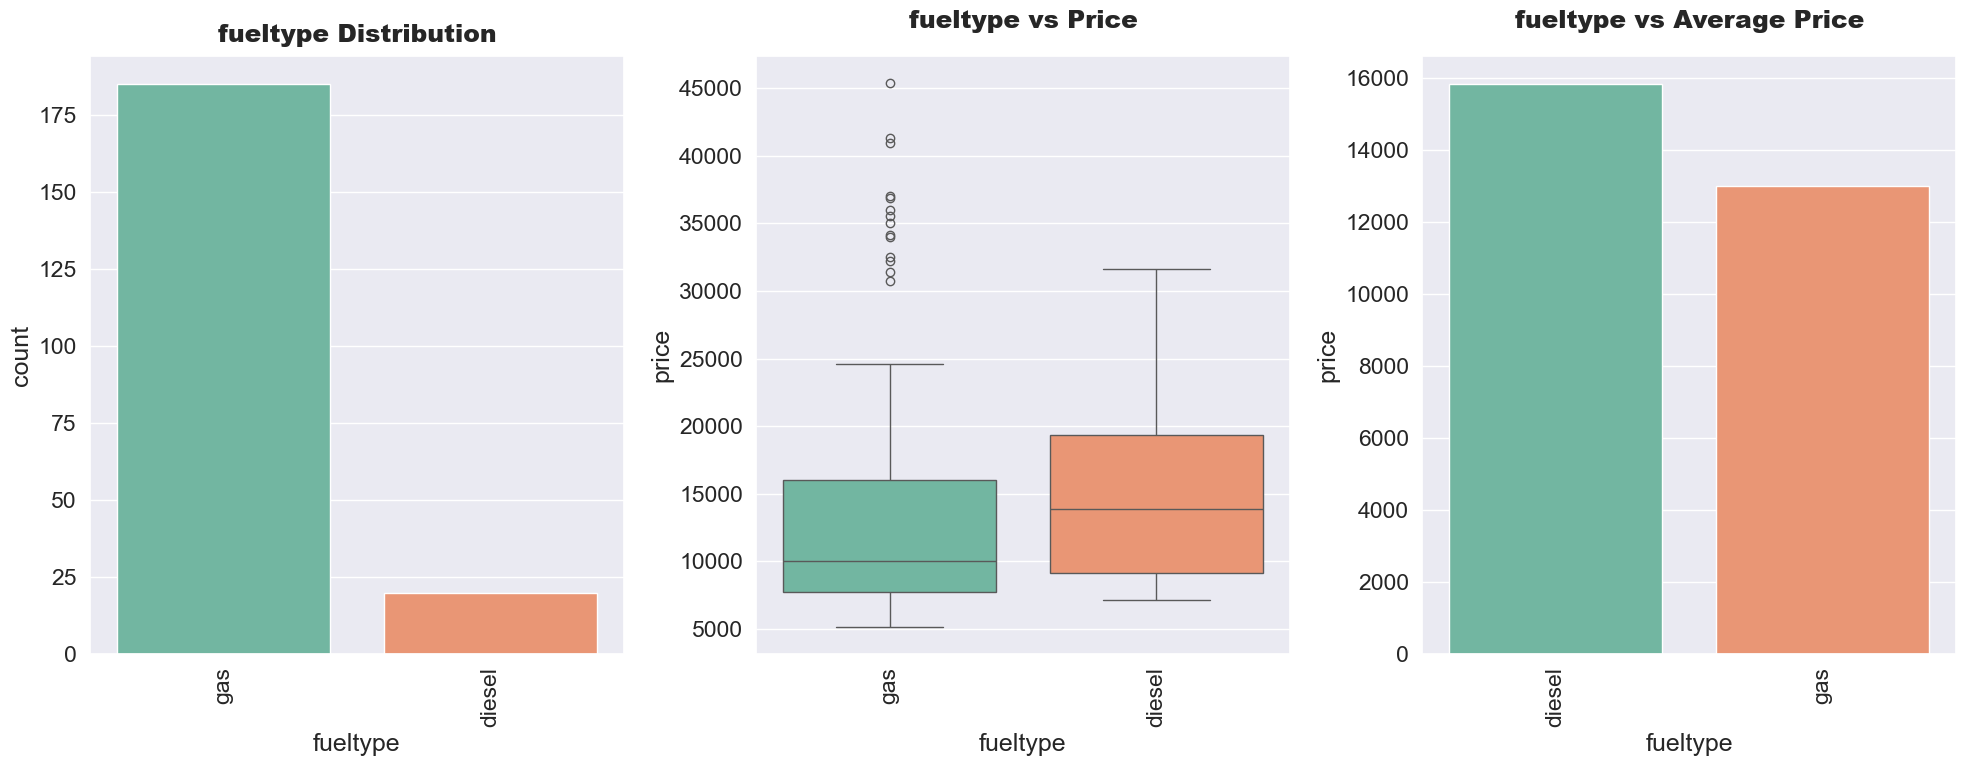

In [109]:
def categorical_visualization(cols):
    plt.figure(figsize=(20,8))
    plt.subplot(1,3,1)
    sns.countplot(x=cols,data=df,palette="Set2",order=df[cols].value_counts().index)
    plt.title(f"{cols} Distribution",pad=10,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)

    plt.subplot(1,3,2)
    sns.boxplot(x=cols,y="price",data=df,palette="Set2")
    plt.title(f"{cols} vs Price",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)
    
    plt.subplot(1,3,3)
    x=pd.DataFrame(df.groupby(cols)["price"].mean().sort_values(ascending=False))
    sns.barplot(x=x.index,y="price",data=x,palette="Set2")
    plt.title(f"{cols} vs Average Price",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

categorical_visualization("fueltype")

## Observations

1️⃣ Left Plot: Fuel Type Distribution

1. Gas cars dominate the dataset, while diesel cars are fewer.
2. This suggests that most cars in the dataset use gas, which could influence price predictions.

2️⃣ Middle Plot: Fuel Type vs Price (Boxplot)

1. Diesel cars have a slightly higher median price than gas cars.
2. Gas cars show a wider price variation with several high-priced outliers (likely luxury models).
3. Diesel cars have less variation, meaning they are more consistently priced.

3️⃣ Right Plot: Fuel Type vs Average Price

1. Diesel cars have a higher average price than gas cars.
2. This indicates that fuel type is an important feature for price prediction.

## Insights

1. We can clearly make an insight that Cars having gas fuel system is mostly sold.
2. From the second plot we can make an insight that Gas Fuel Sysytem cars are availabe within every price range.
3. Both type of fuel cars are having most of the cars price near to average price of the cars. But the gas Fuel Type cars are having cars with high prices also.
4. From the third plot we can make an inisght that the Average price of gas fuel type cars are less than diesel fuel type cars.
5. So we can say that customers prefer those cars which consumes less price in fuels.

5. Visualizing Aspiration Feature.

visualization provides valuable insights into how aspiration type (standard vs turbocharged) impacts car prices.

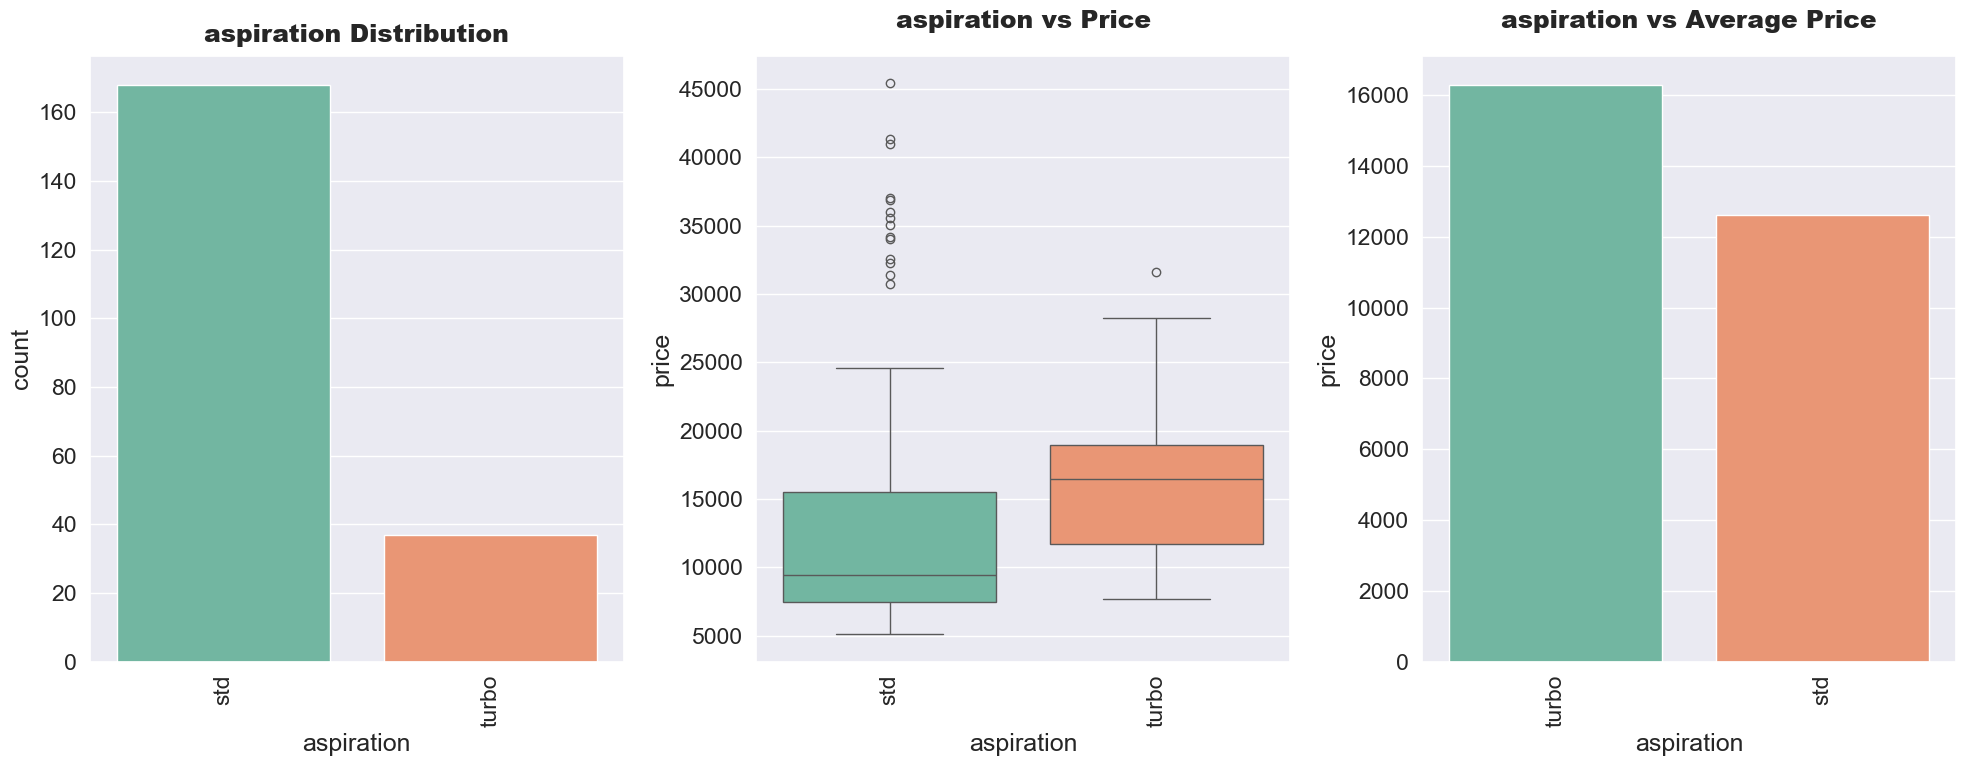

In [110]:
categorical_visualization("aspiration")

## Observations
1️⃣ Left Plot: Aspiration Distribution

1. Most cars have standard aspiration (std), while turbocharged (turbo) cars are relatively fewer.
2. This suggests that turbocharged cars are less common, but their impact on price needs further examination.

2️⃣ Middle Plot: Aspiration vs Price (Boxplot)

1. Turbocharged cars generally have higher prices than standard cars.
2. The median price of turbo cars is above standard cars, suggesting a premium for turbo engines.
3. Standard cars show wider price variation with multiple outliers.

3️⃣ Right Plot: Aspiration vs Average Price

1. Turbocharged cars have a higher average price than standard cars.
2. This confirms that aspiration affects pricing, and turbocharged cars tend to be more expensive.

## Observation

1. Cars having STD Aspiration are highly sold when compared with Turbo Aspiration.
2. Cars having Turbo Aspiration have higher price range than the STD Aspiration.

## Insights

Outliers present in STD Aspiration states that some of the cars having std aspiration are expensive too.

6. Visualizing Door Number Feature

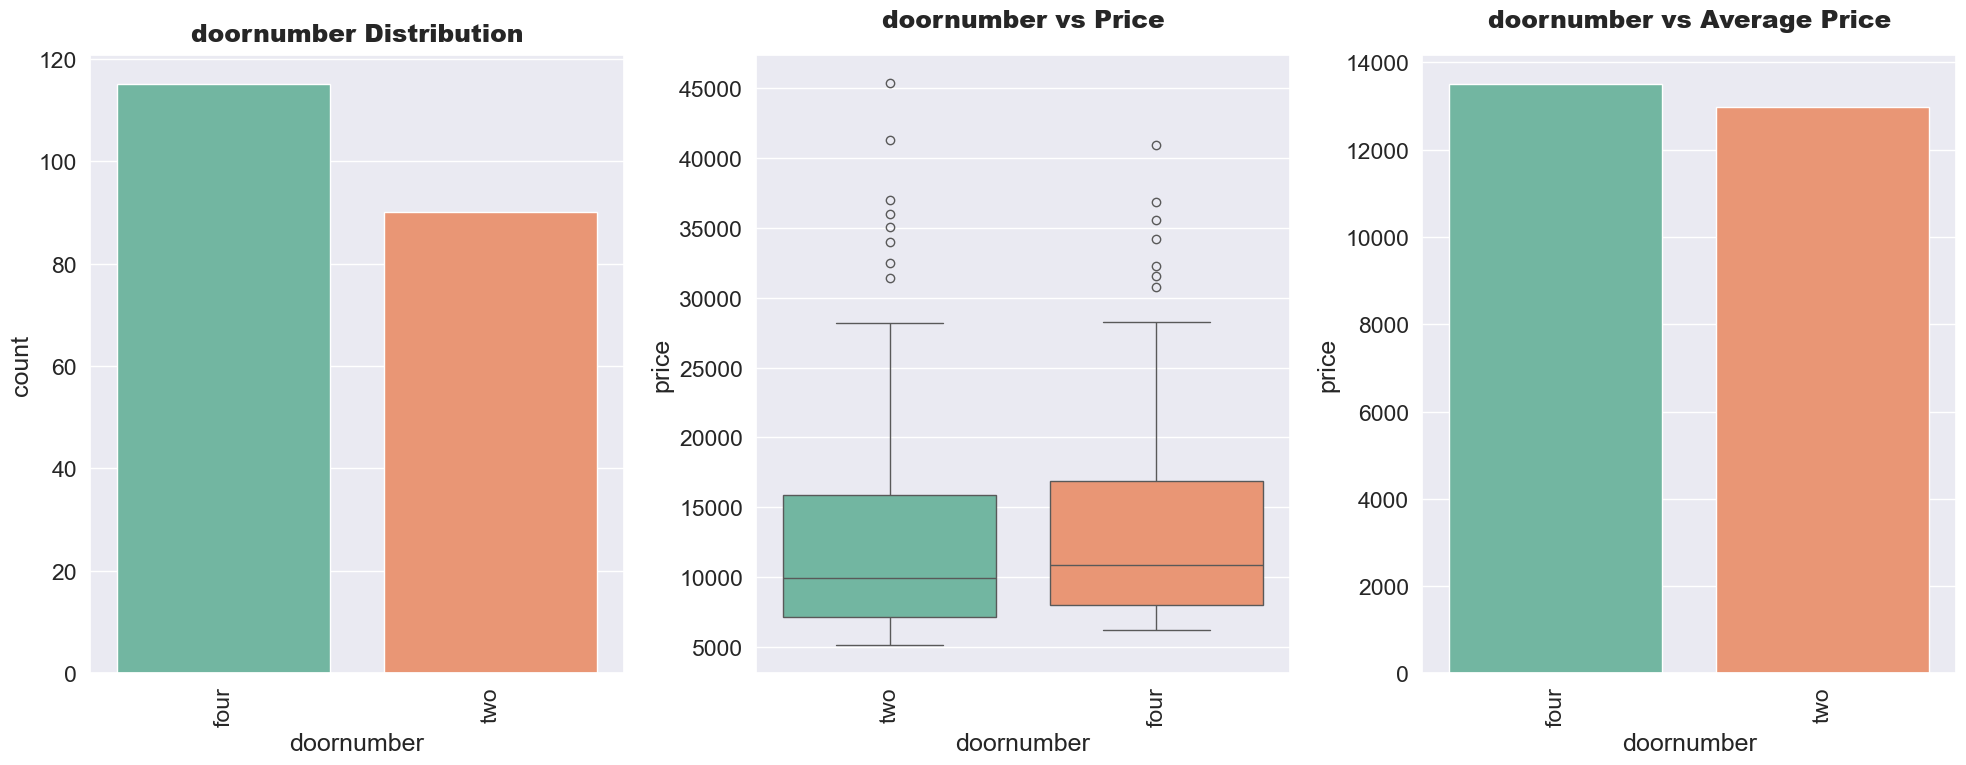

In [111]:
categorical_visualization("doornumber")

## Observations
1️⃣ Left Plot: Door Number Distribution

1. More cars have four doors than two doors.
2. This suggests that four-door cars are more common, likely due to their practicality for families and everyday use.

2️⃣ Middle Plot: Door Number vs. Price (Boxplot)

1. The median prices for two-door and four-door cars are quite similar.
2. Two-door cars show a wider range of prices and have multiple high-value outliers (luxury/sports cars).
3. The distribution indicates that while most two-door cars have a lower price, some high-end models exist.

3️⃣ Right Plot: Door Number vs. Average Price

1. The average prices for two-door and four-door cars are almost the same.
2. This suggests that door number alone is not a strong indicator of car price.

# overall Observation

1. Cars having Four Doors are mostly sold when compared with cars having Two Doors.
2. Cars having Fours Doors are little more expensive when we compare the avergae price of cars having two doors or four doors.

## Insights

1. Cars having Four Doors are mostly sold. But there's not a big difference between the sales of cars having four doors & two doors..
2. Outliers prsesent in two doors cars states that some of the cars are are more expensive than the cars having four doors
3. Door numbers category is not affecting the price that much.

7. Visualizing Car Body Type Feature

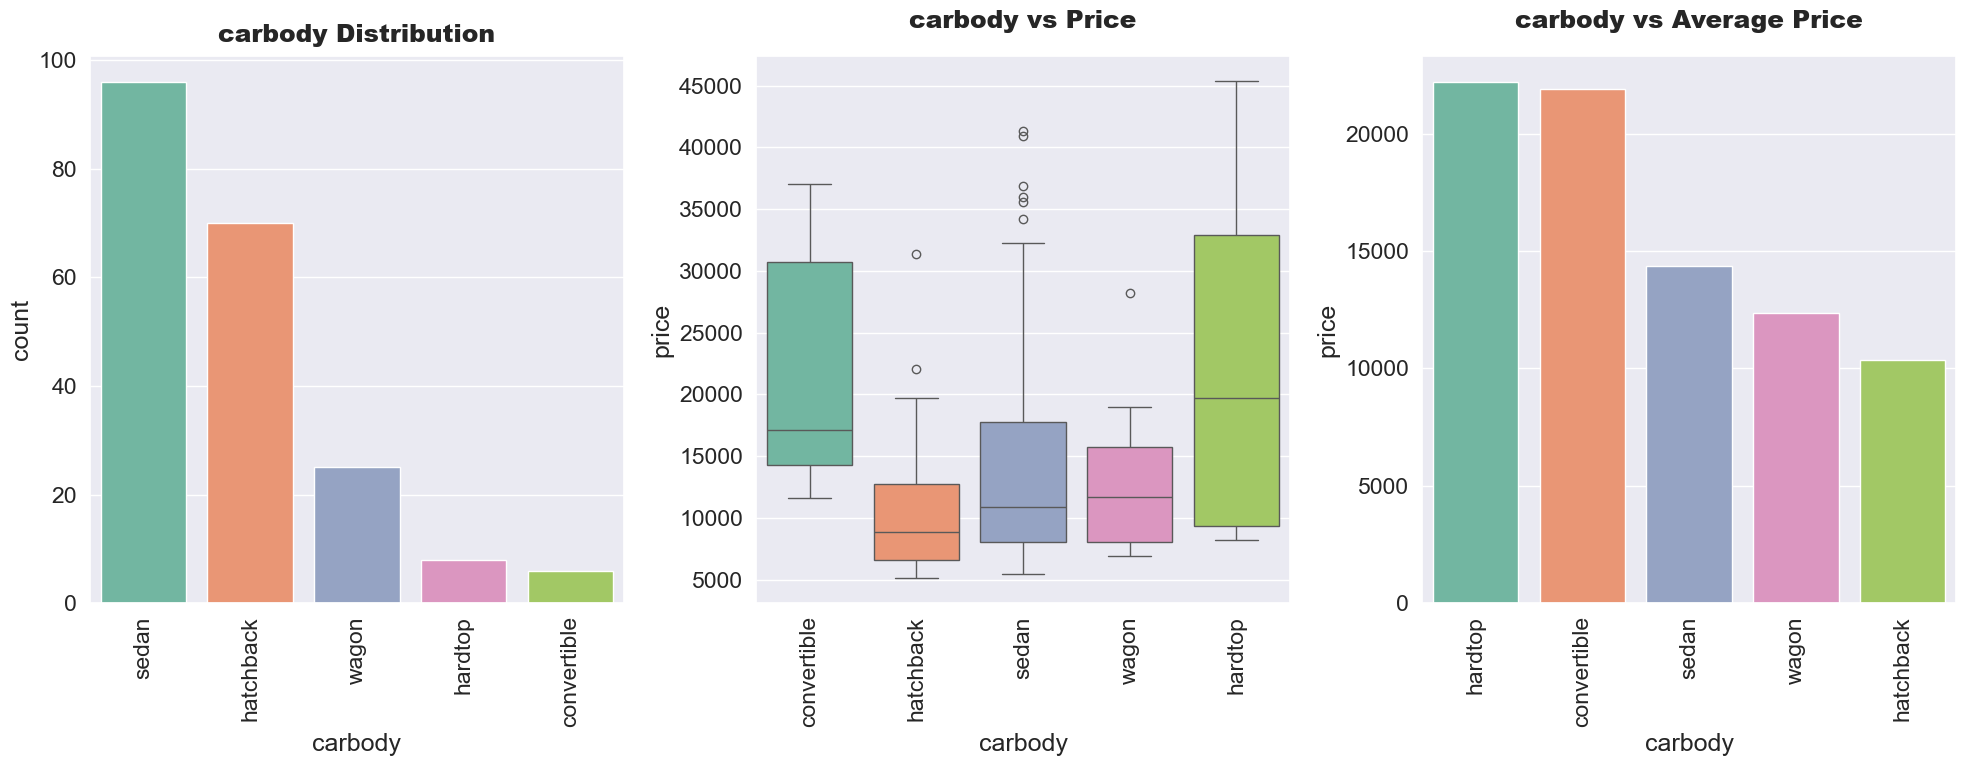

In [112]:
categorical_visualization("carbody")

## Observations
1️⃣ Left Plot: Car Body Distribution

Most common car body types:
Sedan (most frequent)
Hatchback (second most frequent)
Least common car body types:
Hardtop and Convertible (very few cars)

2️⃣ Middle Plot: Car Body vs. Price (Boxplot)

Convertible and Hardtop cars have the highest price range, likely due to their premium and luxury status.
Sedans and hatchbacks have a lower price range with fewer outliers.
Wagons and hatchbacks have similar price distributions, indicating they serve similar market segments.

3️⃣ Right Plot: Car Body vs. Average Price

Convertibles and Hardtops have the highest average price.
Hatchbacks and Wagons have the lowest average price.
Sedans are mid-range in terms of price.

## overall Observation

1. Cars having sedan body-type are mostly sold followed by hatchback.
2. Cars having convertible or hardtop body-type are less sold.
3. Cars having Hardtop body-type is the mostly expensive cars followed by convertible.

## Insights

1. Convertible & Hardtop body-types are less sold because they are very expensive cars. So most of the customers couldn't prefer it.
2. Cars having Sedan body-type is the third most expensive car. But still its having the most number of car sales. So we can say customers prefer medium price range cars.

## Key Takeaways
🚗 Luxury body types (convertible, hardtop) have higher prices.
🚙 Practical cars (sedan, hatchback) dominate the dataset but cost less.
📊 Car body type is an important feature for price prediction.

8. Visualizing Drive Wheel Feature.

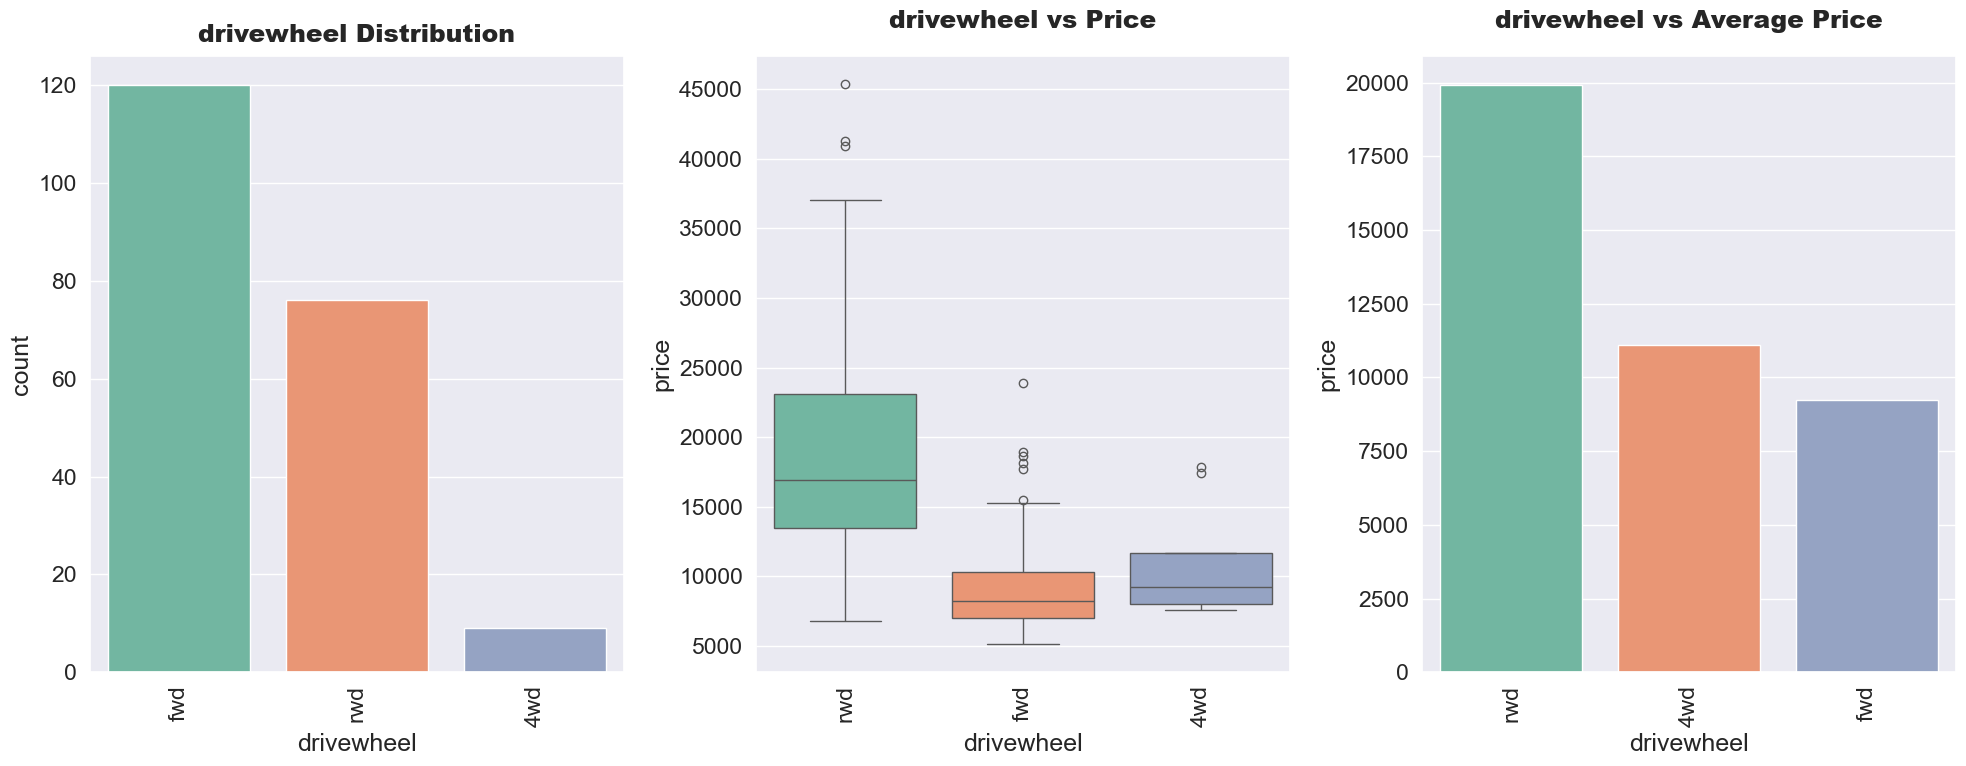

In [113]:
categorical_visualization("drivewheel")

## Observations

1️⃣ Left Plot: Drive Wheel Distribution

Most common drive type: FWD (Front-Wheel Drive)
Common in compact and economy cars.
Second most common: RWD (Rear-Wheel Drive)
Typically used in luxury and performance cars.
Least common: 4WD (Four-Wheel Drive)
Found in off-road and specialized vehicles.

2️⃣ Middle Plot: Drive Wheel vs. Price (Boxplot)

RWD cars have the highest price range, with many high-end models.
FWD cars are lower-priced, with less variation.
4WD cars have a moderate price range, but some outliers exist.

3️⃣ Right Plot: Drive Wheel vs. Average Price

RWD cars have the highest average price (luxury and sports cars).
4WD cars are mid-priced (SUVs and off-road vehicles).
FWD cars have the lowest average price (economy and compact cars).

## over all Observation

Most of the cars which are sold are having Front Wheel Drive (FWD) followed by Rear Wheel Drive (RWD).
Cars having Rear Wheel Drive are mostly expensive cars. But cars having Front Wheel Drive are the cheapest.

## Insights

We can make an insight that the high rated cars must be using Rear Wheel Drive.
Cars with low prices must be using Forward Wheel Drive

## Key Takeaways
🚗 RWD = Higher Prices (Luxury, Sports Cars)
🚙 4WD = Mid-Range (SUVs, Off-Road Vehicles)
🚗 FWD = Most Common & Cheapest (Economy Cars)
📊 Drive Wheel Type is a Crucial Factor in Price Prediction.


9. Visualizing Engine Location Feature.

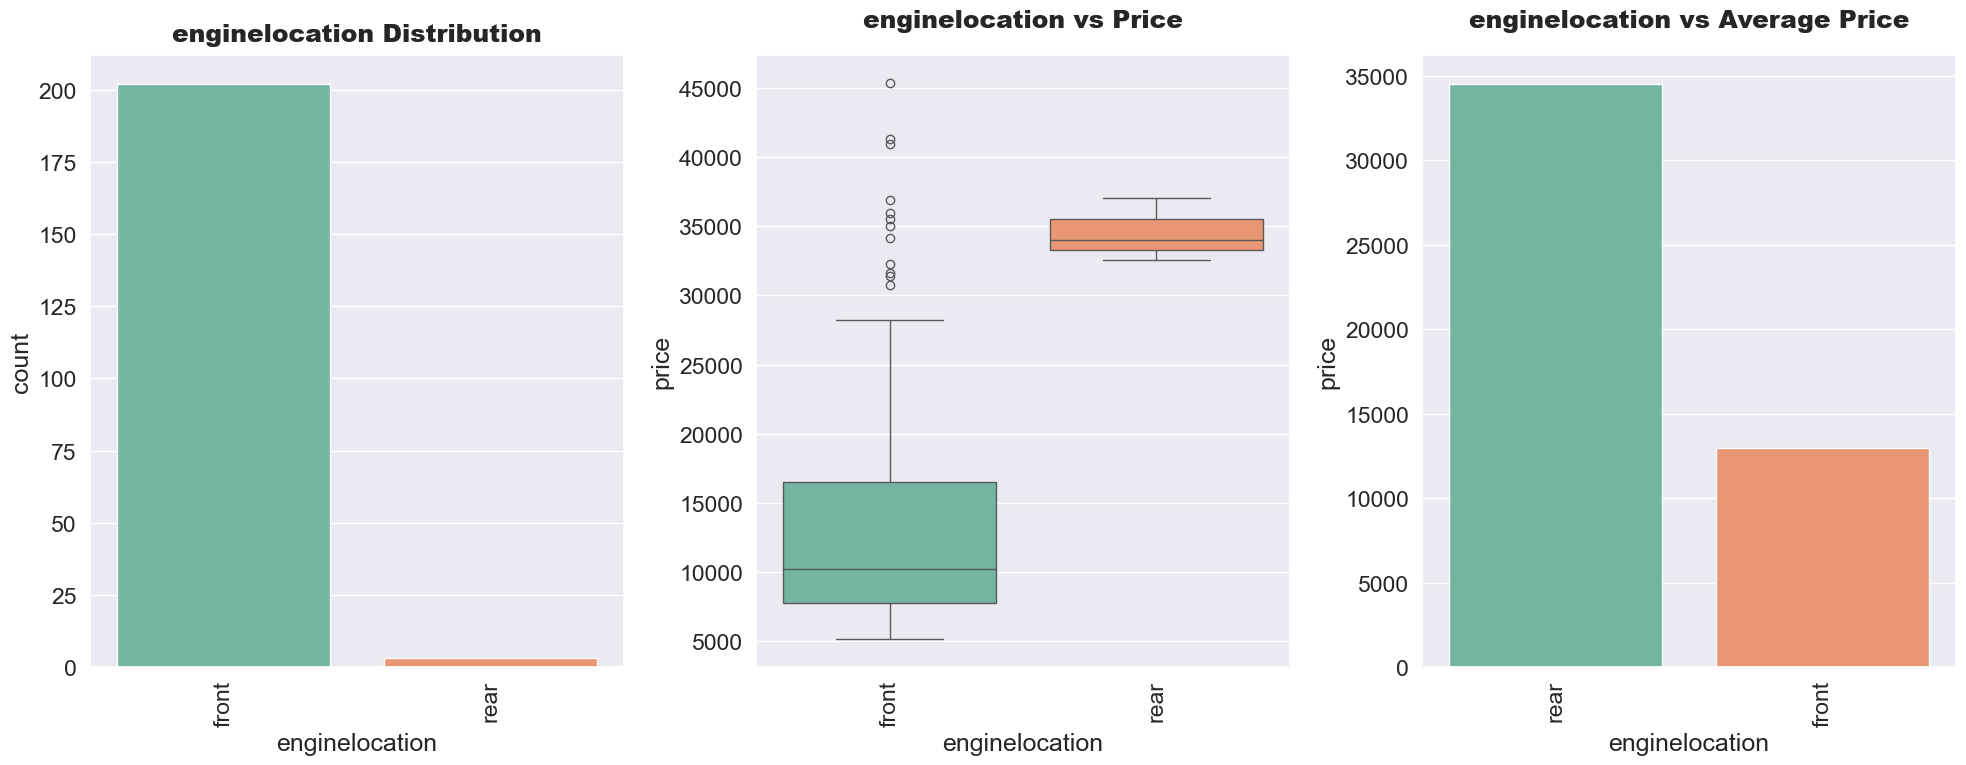

In [114]:
categorical_visualization("enginelocation")

In [115]:
df[df["enginelocation"]=="rear"]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
126,127,3,porsche,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.9,9.5,207,5900,17,25,32528.0
127,128,3,porsche,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.9,9.5,207,5900,17,25,34028.0
128,129,3,porsche,gas,std,two,convertible,rwd,rear,89.5,168.9,65.0,51.6,2800,ohcf,six,194,mpfi,3.74,2.9,9.5,207,5900,17,25,37028.0


## Observations

1️⃣ Left Plot: Engine Location Distribution

Most cars have a front engine.
Common in sedans, SUVs, and economy cars.
Very few cars have a rear engine.
Typically found in high-end sports cars (e.g., Porsche, Ferrari).

2️⃣ Middle Plot: Engine Location vs. Price (Boxplot)

Rear-engine cars are significantly more expensive.
Less variation in price (luxury/sports cars dominate this category).
Front-engine cars have a wider price range.
Includes both economy and high-end models.

3️⃣ Right Plot: Engine Location vs. Average Price

Rear-engine cars have the highest average price.
Suggests that this feature correlates strongly with high-end vehicles.
Front-engine cars have a much lower average price.
Since most economy cars are front-engine, they dominate the lower price range.

## overall Observation

Most of the cars are having engine location in front.

## Insights

Note there are only 3 data-points for the rear category.
So we can't make any inference of car price when compared with engine location.
If we want we can drop this feature before training as it may lead to overfitting.

## Key Takeaways
🚗 Front-engine cars are the majority but vary in price.
🏎️ Rear-engine cars are rare but consistently expensive.
💡 Engine location is a strong price predictor.

10. Visualizing Engine Type Feature.

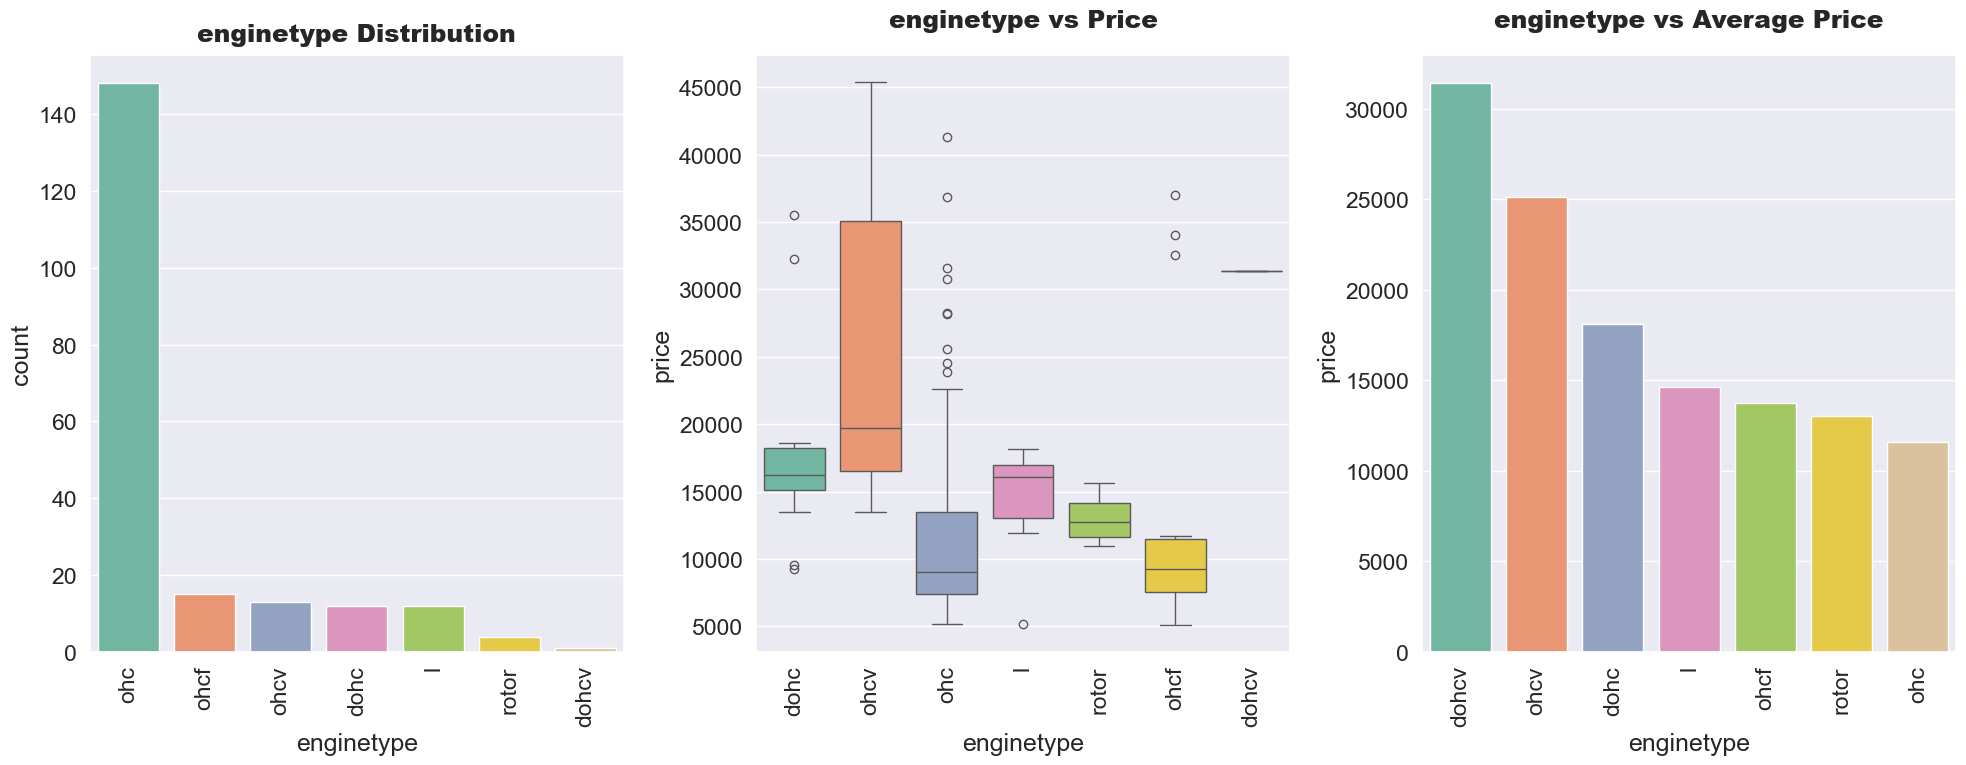

In [116]:
categorical_visualization("enginetype")

In [117]:
df[df["enginetype"]=="dohcv"]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
129,130,1,porsche,gas,std,two,hatchback,rwd,front,98.4,175.7,72.3,50.5,3366,dohcv,eight,203,mpfi,3.94,3.11,10.0,288,5750,17,28,31400.5


In [118]:
df[df["enginetype"]=="rotor"]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
55,56,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,3.33,3.255,9.4,101,6000,17,23,10945.0
56,57,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,3.33,3.255,9.4,101,6000,17,23,11845.0
57,58,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2385,rotor,two,70,4bbl,3.33,3.255,9.4,101,6000,17,23,13645.0
58,59,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2500,rotor,two,80,mpfi,3.33,3.255,9.4,135,6000,16,23,15645.0


## Observations

1️⃣ Left Plot: Engine Type Distribution

Most cars use OHC (Overhead Camshaft) engines.
Common in economy and mid-range vehicles.
DOHC, OHCV, and other types are less frequent.
Typically found in performance and luxury cars.

2️⃣ Middle Plot: Engine Type vs. Price (Boxplot)

DOHCV engines have the highest price range.
Found in high-end sports/luxury cars.
OHC engines have a wide price range with many outliers.
This suggests a mix of economy and mid-range models.
OHCV and DOHC engines also show higher median prices.
These engine types are likely used in premium vehicles.

3️⃣ Right Plot: Engine Type vs. Average Price

DOHCV and OHCV engines have the highest average price.
OHC engines have the lowest average price.
This aligns with their dominance in budget-friendly cars.

## Insights

Cars having Overhead Camshaft (OHC) engines are mostly sold.
Only one car has been sold having engine type dohcv.
There are very few data-points of engine type dohcv & rotor. So we can say that cars having ohcv engine types are mostly expensive.
Cars having Overhead Camshaft (OHC) engines are least expensive cars.

## Key Takeaways
💰 DOHCV and OHCV engines are strongly associated with expensive cars.
🚗 OHC engines dominate the market but are generally cheaper.
📊 Engine type is a strong predictor of car price.



11. Visualizing Cyclinder Number Feature.

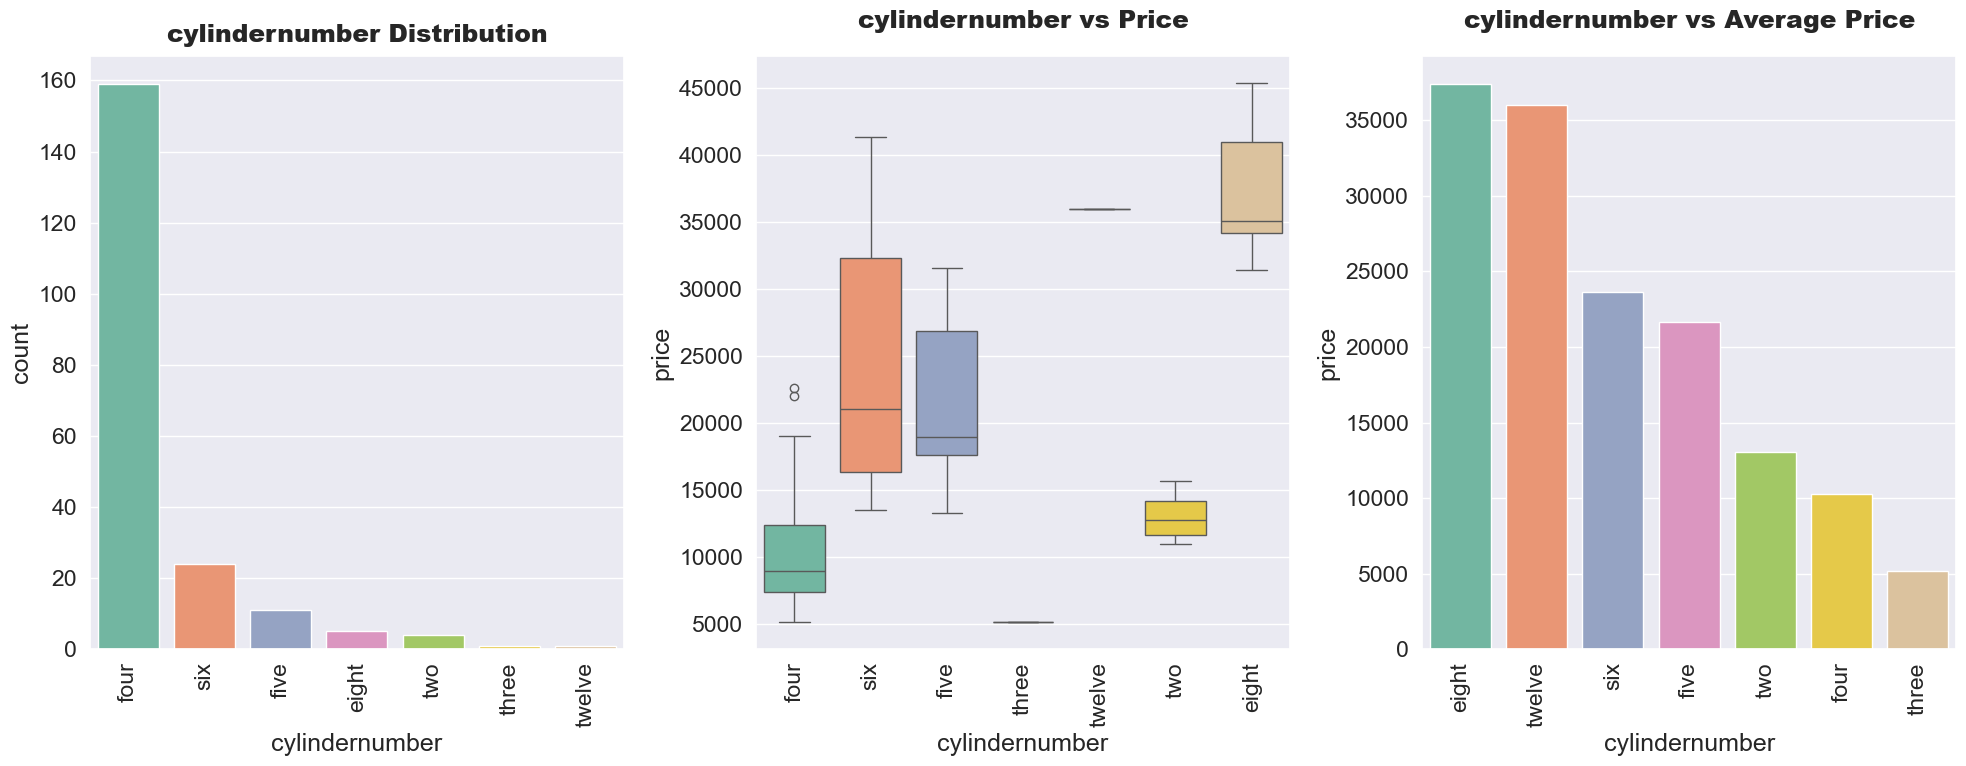

In [119]:
categorical_visualization("cylindernumber")

In [120]:
df[df["cylindernumber"]=="three"]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
18,19,2,chevrolet,gas,std,two,hatchback,fwd,front,88.4,141.1,60.3,53.2,1488,l,three,61,2bbl,2.91,3.03,9.5,48,5100,47,53,5151.0


In [121]:
df[df["cylindernumber"]=="twelve"]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
49,50,0,jaguar,gas,std,two,sedan,rwd,front,102.0,191.7,70.6,47.8,3950,ohcv,twelve,326,mpfi,3.54,2.76,11.5,262,5000,13,17,36000.0


## Observations

1️⃣ Left Plot: Cylinder Number Distribution

4-cylinder engines dominate the dataset.
These are commonly found in fuel-efficient and economy cars.
6-cylinder engines are the second most common.
Found in mid-range sedans and SUVs.
Higher cylinder counts (8, 12) are rare.
Usually present in luxury and sports cars.

2️⃣ Middle Plot: Cylinder Number vs. Price (Boxplot)

12-cylinder and 8-cylinder cars have the highest price range.
These are typically high-performance or luxury cars.
6-cylinder and 5-cylinder cars have mid-to-high prices.
Found in premium vehicles.
4-cylinder and lower have the lowest price range.

Used in economy cars.

3️⃣ Right Plot: Cylinder Number vs. Average Price
8-cylinder and 12-cylinder cars have the highest average prices.
4-cylinder and 3-cylinder cars have the lowest prices.
Reinforces that higher cylinder counts correlate with higher prices.

## Insights

Most of the cars are having Four cyclinders followed by cars having six cyclinders.
There are only one data-point each for car having Three & Twelve data-points.
Cars having eight cyclinders are most expensive cars followed by six cyclinders.

## Key Takeaways
💰 More cylinders generally mean higher prices.
🚗 4-cylinder engines dominate the market but are generally cheaper.
📊 Cylinder count is a strong predictor of car price.

12. Visualizing Fuel System Feature.

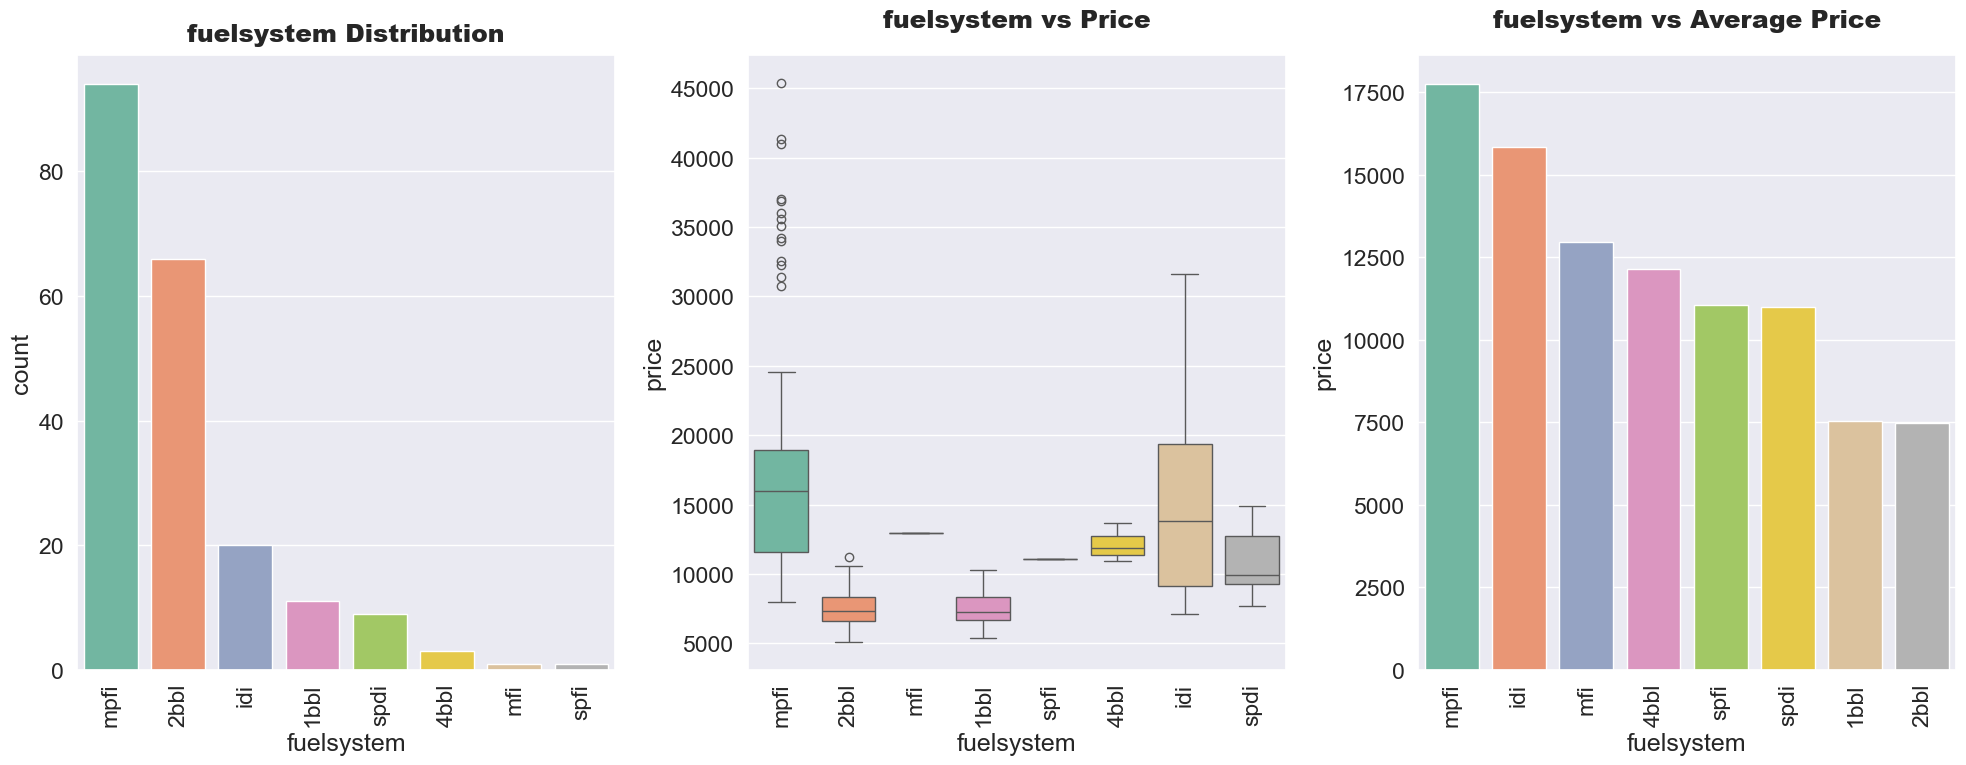

In [122]:
categorical_visualization("fuelsystem")

## Observations

1️⃣ Left Plot: Fuel System Distribution

Most common fuel systems:
MPFI (Multi-Point Fuel Injection) is the most widely used.
2BBL (2-Barrel Carburetor) is the second most common.
IDI (Indirect Injection) is also present but in smaller numbers.
Less common fuel systems include:
1BBL, SPDI, 4BBL, MFI, and SPFI are relatively rare.

2️⃣ Middle Plot: Fuel System vs. Price (Boxplot)

MPFI has the widest price range, with some high-priced outliers.
IDI has a higher median price, showing some expensive models.
Carburetor-based systems (1BBL, 2BBL) have lower prices, indicating their presence in budget cars.
SPDI and SPFI are in the mid-range.

3️⃣ Right Plot: Fuel System vs. Average Price

MPFI has the highest average price: This makes sense as MPFI is used in modern, fuel-efficient, and high-performance cars.
IDI follows closely: Found in some diesel-powered vehicles, often used in expensive models.
MFI, 4BBL, SPFI, and SPDI fall into the mid-range.
1BBL and 2BBL have the lowest average prices: These are traditional carburetor-based systems, typically found in older or economy cars.

## Insight

Most of the cars are having mpfi & 2bbl fuelsystems.
Cars having mpfi fuel system are the expensive cars followed by idi fuel system cars.
There are only one data-point for each mfi and spfi fuelsystem cars. So we can make any further inference.

## Key Takeaways
🔹 MPFI and IDI are linked to higher car prices.
🔹 Carburetor-based systems (1BBL, 2BBL) are in lower-cost vehicles.
🔹 Fuel system is an important feature to consider when predicting price.




13. Visualizing Symboling Feature.

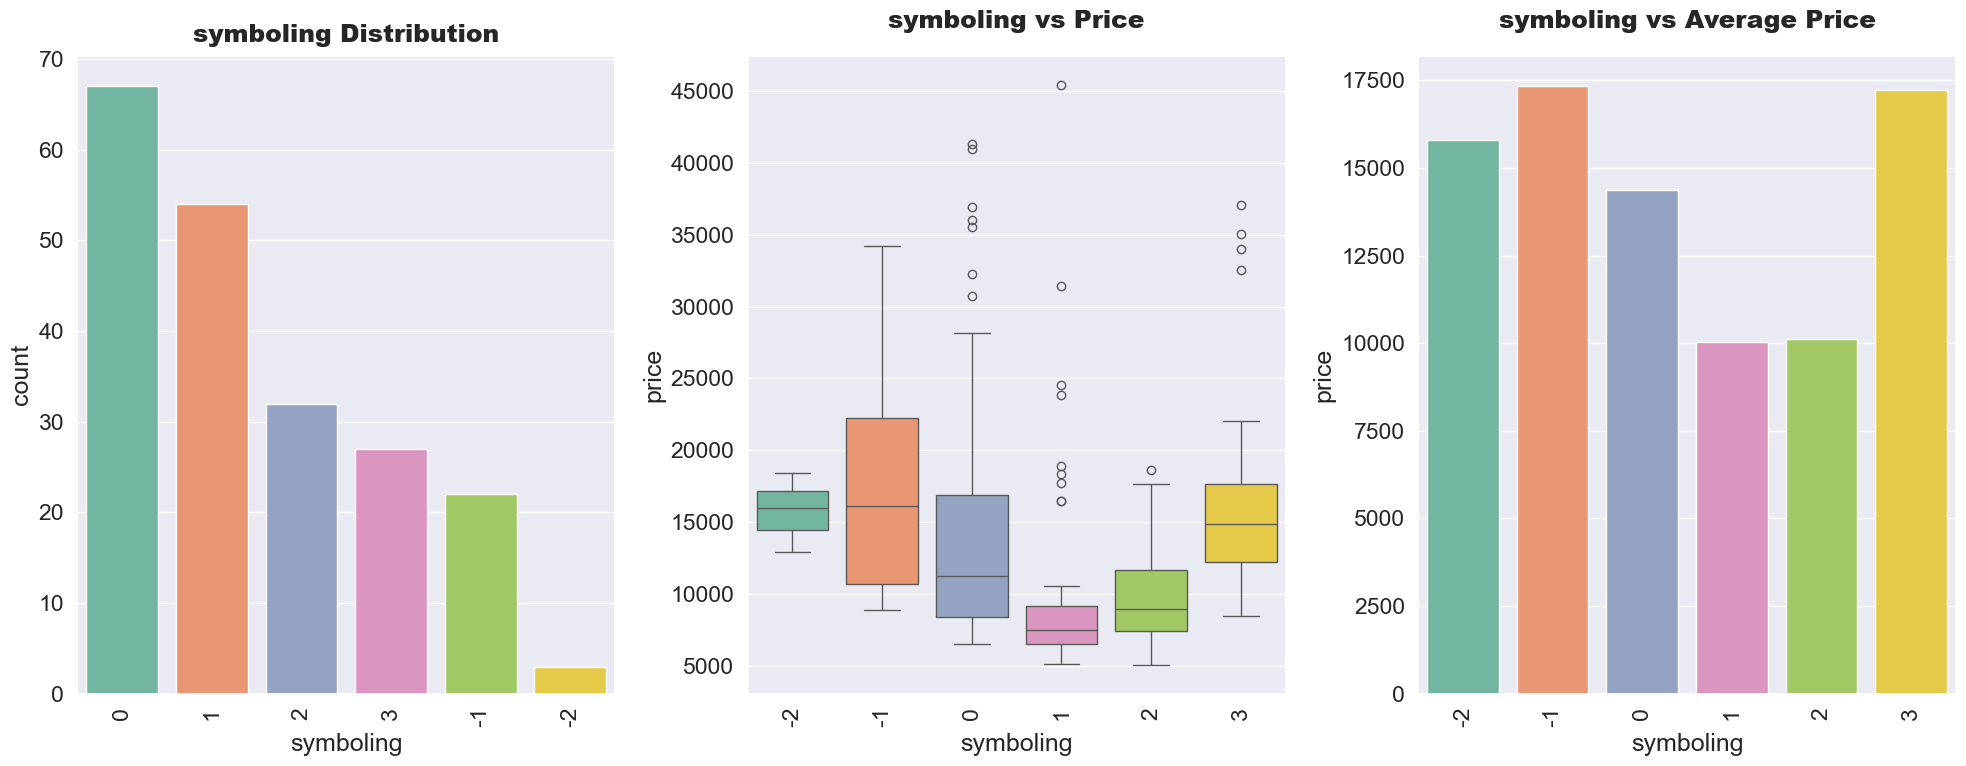

In [123]:
categorical_visualization("symboling")

## observation

1️⃣ Left Plot: Symboling Distribution

Symboling values range from -2 to 3.
Most common symboling values:
0 and 1 have the highest counts.
Higher symboling values (2, 3) are less frequent.
Negative symboling values (-1, -2) are rare.

2️⃣ Middle Plot: Symboling vs. Price (Boxplot)

Lower symboling values (-2, -1) are associated with higher median prices.
Cars with negative symboling tend to be premium models.
Higher symboling values (2, 3) correspond to lower-priced cars.
Symboling 0 has a broad price range, showing a mix of budget and expensive cars.

3️⃣ Right Plot: Symboling vs. Average Price

Negative symboling (-2, -1) has the highest average car price.
These cars are likely luxury or high-end models.
Positive symboling (2, 3) has the lowest average car price.
These could be economy or budget-friendly cars.

## overall observation

The symboling represents the degree to which the car is riskier than its price suggests.
It ranges from -3 to +3, with higher negative values indicating higher risk and higher positive values indicating lower risk.
In other words, a car with a symboling of -3 is considered riskier than a car with a symboling of +3, and is likely to have a lower price as a result.

## Insights

We can clearly observe cars having symboling 0 or 1 are motly preferred.
We can aslo observe that symboling -1, 0, 3 are expensive.

## Key Takeaways
🔹 Symboling can be an indicator of car class or safety.
🔹 Lower symboling values (-2, -1) are associated with high-end cars.
🔹 Higher symboling values (2, 3) correspond to more affordable cars.
🔹 Symboling is a useful feature for price prediction models.

14. Visualizing "CarLength", "CarWidth","Carheight" Features w.r.t "Price".

In [124]:
def scatter_plot(cols):
    x=1
    plt.figure(figsize=(15,6))
    for col in cols:
        plt.subplot(1,3,x)
        sns.scatterplot(x=col,y="price",data=df,color="blue")
        plt.title(f"{col} vs Price",fontweight="black",fontsize=20,pad=10)
        plt.tight_layout()
        x+=1

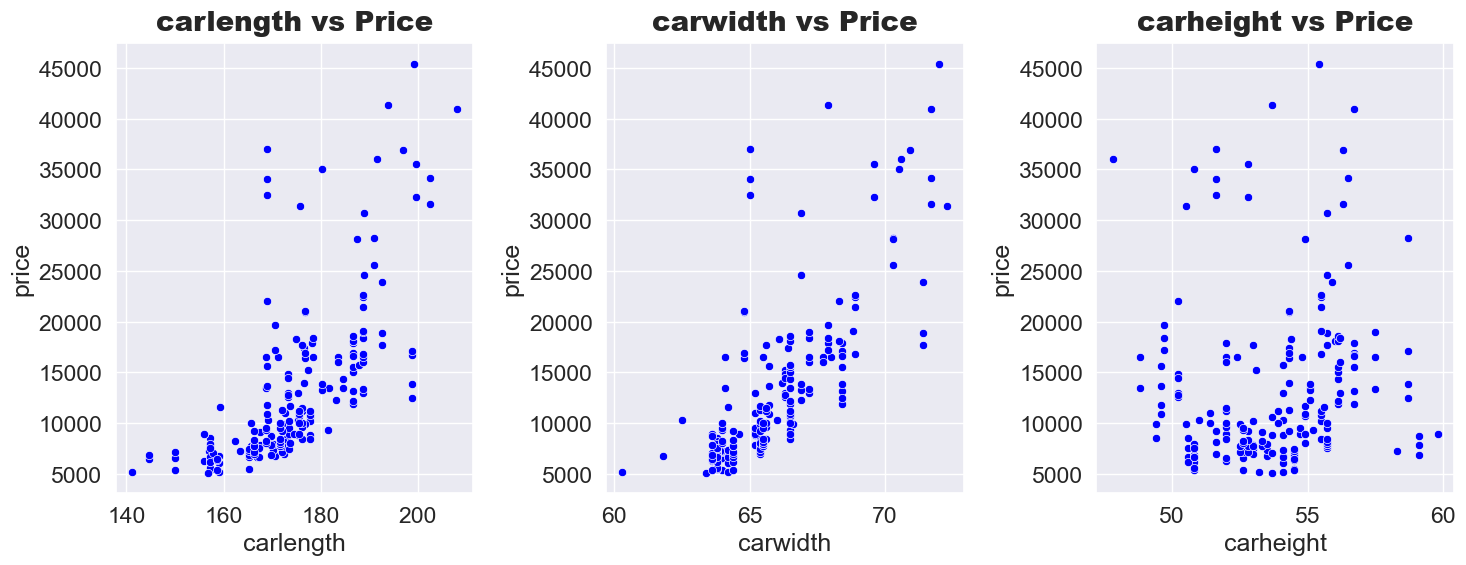

In [125]:
scatter_plot(["carlength","carwidth","carheight"])

## Observations

1️⃣ Car Length vs. Price (Left Plot)

Positive correlation: As car length increases, price tends to rise.
Longer cars are generally more expensive, likely because they belong to premium or luxury categories.
Some high-priced outliers exist for longer cars.

2️⃣ Car Width vs. Price (Middle Plot)

Strong positive correlation: Wider cars tend to be more expensive.
Wider vehicles may indicate higher-end models with better interiors and features.
A clear price separation is visible between narrow, mid-range, and wide luxury cars.

3️⃣ Car Height vs. Price (Right Plot)

Weak or no correlation: Price does not significantly depend on car height.
More variance in price across different heights, meaning car height alone is not a strong indicator of price.
Cars of similar height have a broad price range, suggesting other factors like brand and engine power play a larger role.

## Insights

We can clearly observe that carlength & carwidth features are highly correlated with the price feature.
So we can make an insight that with increment in length & width of the car there is an increment in price too.
From carlength vs price we can't make any inference as the data-points are too scattered.
Since CarHeight is not affecting Price We can drop this feature.

## Key Takeaways
✅ Car length and width have a strong impact on price.
✅ Car height does not show a strong relationship with price.
✅ Including car length and width in a regression model could improve predictions.

15. Visualizing "EngineSize","Boreratio" & "Stroke" Features

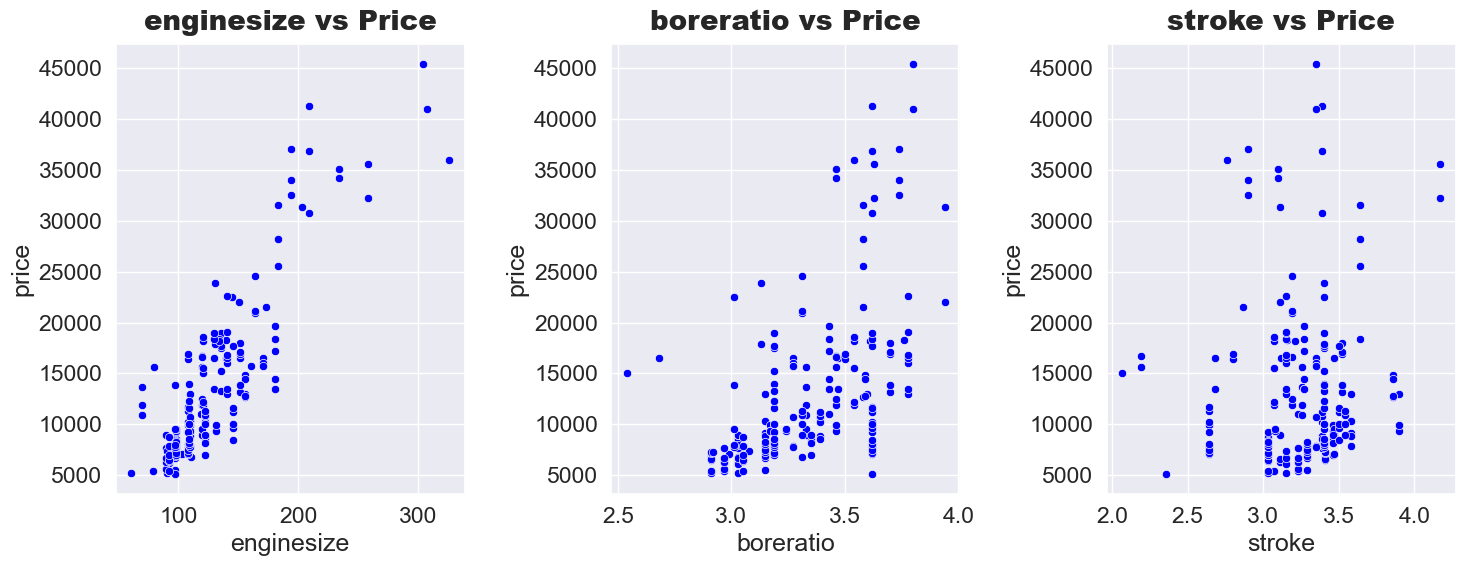

In [126]:
scatter_plot(["enginesize","boreratio","stroke"])

## Observations

1️⃣ Engine Size vs. Price (Left Plot)

Strong positive correlation: Larger engine sizes lead to higher prices.
A clear upward trend: Higher engine displacement is associated with more powerful and expensive cars.
Engine size is a crucial predictor for price modeling.

2️⃣ Bore Ratio vs. Price (Middle Plot)

Moderate correlation: As bore ratio increases, price generally rises.
Some variation: The relationship is not as strong as engine size.
Higher bore ratio cars tend to be more expensive, but with more price variability.

3️⃣ Stroke vs. Price (Right Plot)

Weak or no clear correlation: Price varies across different stroke values.
More scattered data: Indicates stroke is not a strong predictor of price.
Including stroke in regression may not add much value.

## Insights

We can clearly observe that Enginesize is highly correlated with price feature. So we can say with the increment in enginesize the price of the cars increases.
From Boreratio vs Price we can observe that the feature is not highly correlated but still there's a correlation between the features. So we can say with increment in boreratio the price of cars increases.
From Stroke vs Price we can't make any inference as the data-points are too scattered.
Since Stroke is not affecting Price that much. We can drop this feature.

## Key Takeaways
✅ Engine size has a strong impact on price and should be included in regression.
✅ Bore ratio shows some correlation but may need further analysis.
✅ Stroke does not significantly affect price and might not be useful in modeling.

16. Visualizing "Compreessionratio","Horesepower" & "Peakrpm" Features.

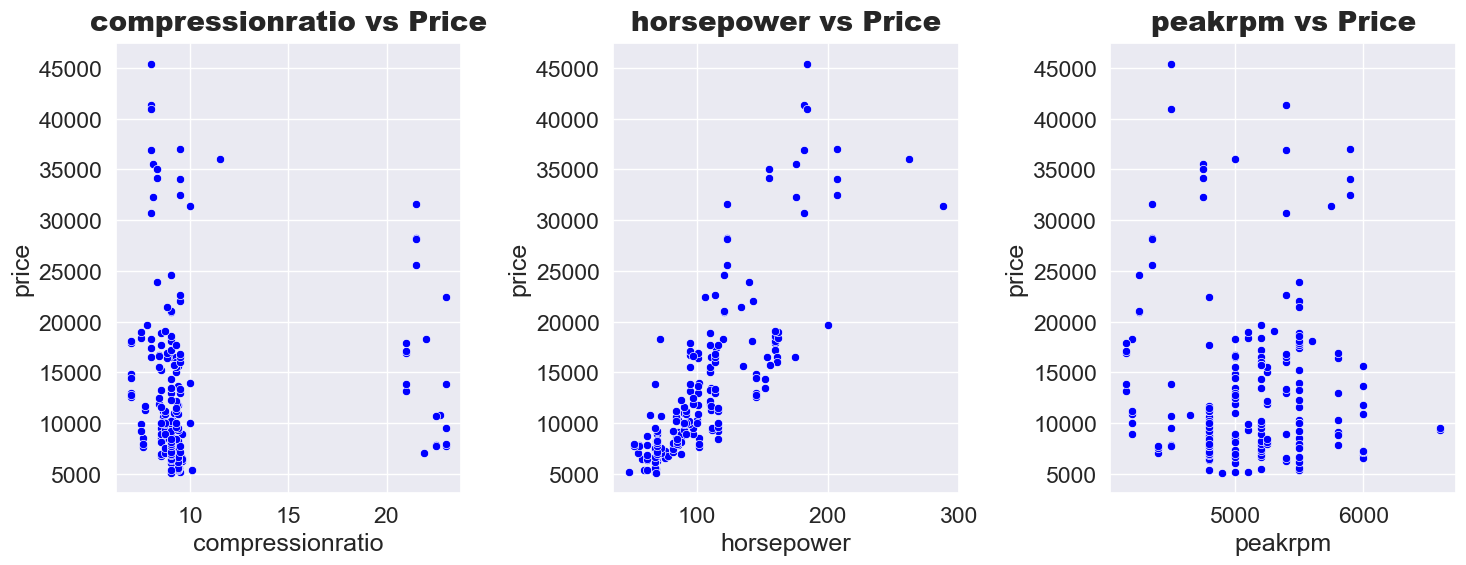

In [127]:
scatter_plot(["compressionratio","horsepower","peakrpm"])

## Observations

1️⃣ Compression Ratio vs. Price (Left Plot)

No clear trend: Price is widely scattered for different compression ratios.
Most cars have a compression ratio below 10, with a few outliers above 20.
Compression ratio might not be a strong predictor of price.

2️⃣ Horsepower vs. Price (Middle Plot)

Strong positive correlation: Higher horsepower generally leads to a higher price.
Clear upward trend: More powerful engines typically belong to premium vehicles.
Horsepower is a key feature for price prediction.

3️⃣ Peak RPM vs. Price (Right Plot)

No obvious correlation: Price is spread across different peak RPM values.
High variance: Indicates peak RPM is not a significant factor in determining price.
Peak RPM may not be useful in regression modeling.

## Insights

We can clearly observe that Horsepower is highly correlated with Price. So we can say with the increment in Horsepower the price of cars also increases.
From Compressionratio vs Price & Peakrpm vs Price visuals we can't make any inference as the data-points are too scattered.
SInce Compressionratio & Peakrpm is not affecting price. So we can drop this features.

## Key Takeaways
✅ Horsepower has a strong influence on price and should be included in regression.
✅ Compression ratio and peak RPM show weak or no correlation with price.
✅ Focusing on horsepower, engine size, and width would likely improve the model.



17. Visualizing "WheelBase" & "Curbweight" Features.

In [128]:
def scatter_plot(cols):
    x=1
    plt.figure(figsize=(15,6))
    for col in cols:
        plt.subplot(1,2,x)
        sns.scatterplot(x=col,y="price",data=df,color="blue")
        plt.title(f"{col} vs Price",fontweight="black",fontsize=20,pad=10)
        plt.tight_layout()
        x+=1

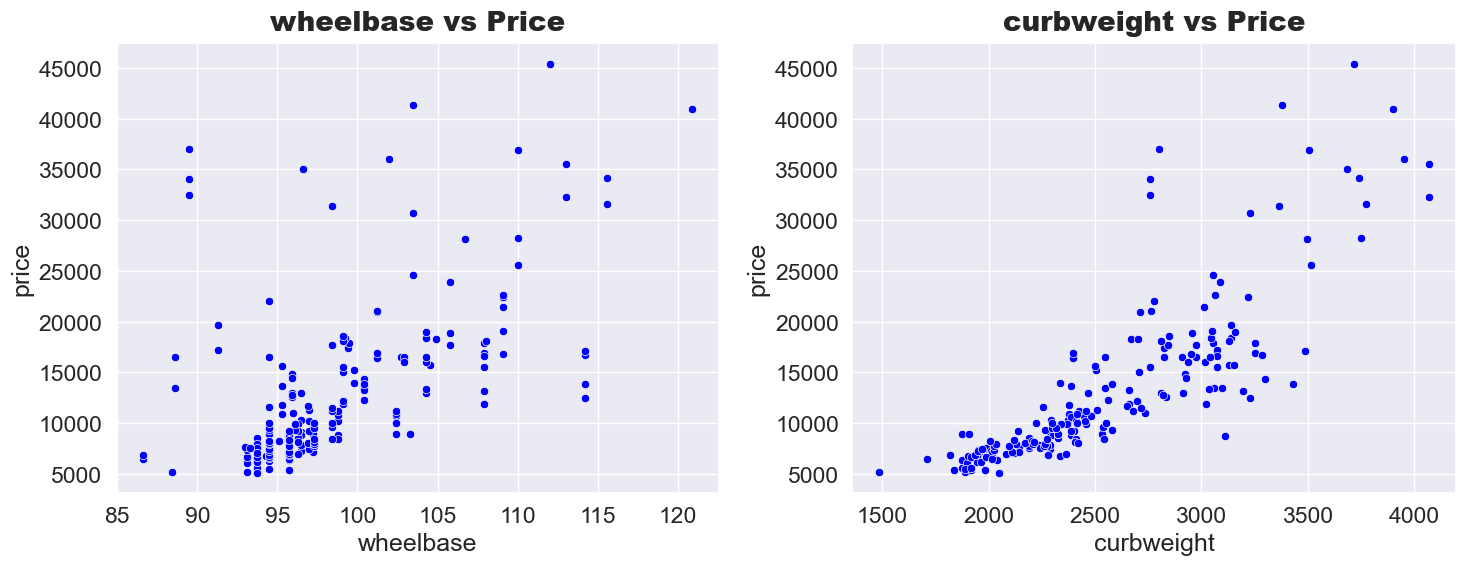

In [129]:
scatter_plot(["wheelbase","curbweight"])

## Observations

1️⃣ Wheelbase vs. Price (Left Plot)

Slight upward trend: Larger wheelbase may indicate a higher price, but the correlation is weak.
High variance: Price is spread out for similar wheelbase values.
Wheelbase alone is not a strong predictor of price.

2️⃣ Curb Weight vs. Price (Right Plot)

Strong positive correlation: Heavier cars tend to have higher prices.
Clear upward trend: As curb weight increases, price consistently rises.
Curb weight is a strong predictor of price.

## Insights

We can clearly observe that Curbweight is highly correlated with Price. So we can say with the increase in curbweight the price of cars increases.
From wheelbase vs price we can say that they are not highly correlated but still there's a correlation. So with wheel base the price of the cars also increases.

## Key Takeaways

✅ Curb weight has a strong influence on price and should be included in regression.
⚠️ Wheelbase has a weak correlation and might not add significant predictive power.


18. Visualizing "Citympg" & "Highwaympg" Features

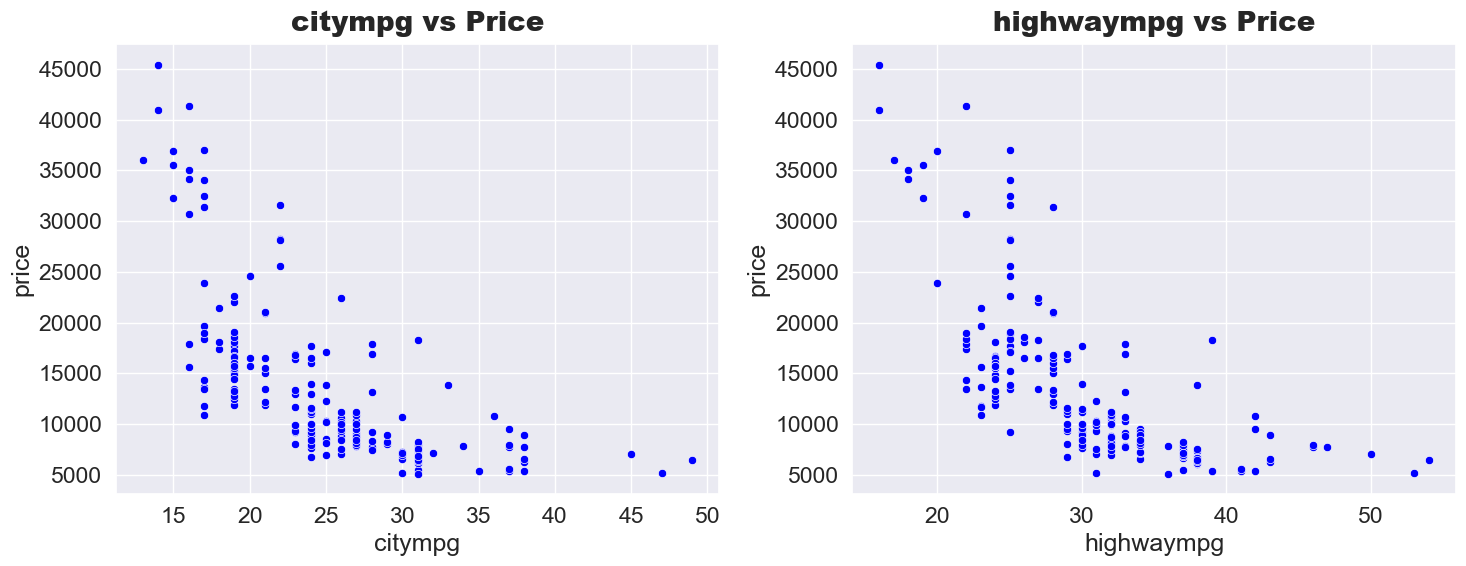

In [130]:
scatter_plot(["citympg","highwaympg"])

## Observations

1️⃣ City MPG vs. Price (Left Plot)

Negative correlation: As city MPG increases, price tends to decrease.
Luxury cars (higher price) generally have lower MPG: This suggests that high-performance or luxury cars consume more fuel.

2️⃣ Highway MPG vs. Price (Right Plot)

Similar negative trend: Higher highway MPG is associated with lower car prices.
Economy cars with high MPG are cheaper, whereas low MPG is linked to higher prices.

## Insights

We can clearly observe that Citympg & Highwaympg are having negative correlation with the price.
So we can say that with the increment in citympg & Highwaympg the price of the cars decreases.
So our both Citympg & Highwaympg are useful features for price prediction.

## Key Takeaways
✅ City and highway MPG are negatively correlated with price.
✅ Fuel-efficient cars tend to be more affordable, while performance/luxury cars have lower MPG and higher prices.
⚠️ MPG is an important feature for price prediction but should be used carefully alongside other factors like horsepower and curb weight.

18. List of all the useful Features.

## List of all the useful Categorical Features.

CompanyName
Fuel Type
Aspiration
Door Number
Car Body
Drive Wheel
Engine Type
Cyclinder Number
Fuel System

## List of all he useful Numerical Features.

Wheelbase
Carlength
Carwidth
Curbeweight
Enginesize
Boreratio
Horsepower
citympg
Highwaympg
Price

## Feature Engineering

## 1. Deriving New Features From "Company Name" Feature.
As we made an insight above that we can split the car company name into different price ranges.Like Low Range, Medium Range, High Range cars.

## This line of code calculates the average price of cars for each company and rounds the result to two decimal places.

In [131]:
z = round(df.groupby(["CompanyName"])["price"].agg(["mean"]),2).T
z

CompanyName,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
mean,15498.33,17859.17,26118.75,33647.0,6007.0,7875.44,8184.69,8916.5,34600.0,10652.88,16503.0,9239.77,10415.67,15489.09,7963.43,31400.5,9595.0,15223.33,8541.25,9885.81,10077.5,18063.18


## Note

In above output we fetched the avergae price of each individual car companies
Now we have to add this average values a new column in our datset.

In [132]:
df = df.merge(z.T,how="left",on="CompanyName")

## This code categorizes cars into price ranges (Budget, Medium, High-end) based on their average price per company.

In [133]:
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
df['CarsRange'] = pd.cut(df['mean'],bins,right=False,labels=cars_bin)
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,mean,CarsRange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,15498.33,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,15498.33,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,15498.33,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,17859.17,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,17859.17,Medium


## Data Preprocessiong

1. Creating new DataFrame with all the useful Features.

In [134]:
new_df = df[['fueltype','aspiration','doornumber','carbody','drivewheel','enginetype','cylindernumber','fuelsystem'
             ,'wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg',
             'price','CarsRange']]

In [135]:
new_df.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginetype,cylindernumber,fuelsystem,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,CarsRange
0,gas,std,two,convertible,rwd,dohc,four,mpfi,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495.0,Medium
1,gas,std,two,convertible,rwd,dohc,four,mpfi,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500.0,Medium
2,gas,std,two,hatchback,rwd,ohcv,six,mpfi,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500.0,Medium
3,gas,std,four,sedan,fwd,ohc,four,mpfi,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0,Medium
4,gas,std,four,sedan,4wd,ohc,five,mpfi,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450.0,Medium


In [136]:
new_df.shape

(205, 19)

2. Creating Dummies Variables for all the Categorical Features.

## This code converts categorical variables into numerical form using one-hot encoding.

Uses pd.get_dummies() to create dummy variables

1. Converts categorical columns into binary (0/1) features
2. Original categorical columns are removed and replaced with new encoded columns

Key Takeaways
✅ Converts categorical features into numeric form.
✅ Helps machine learning models process categorical data efficiently.

In [137]:
new_df = pd.get_dummies(columns=["fueltype","aspiration","doornumber","carbody","drivewheel","enginetype",
                                "cylindernumber","fuelsystem","CarsRange"],data=new_df)

In [138]:
new_df.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarsRange_Budget,CarsRange_Medium,CarsRange_Highend
0,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495.0,False,True,True,False,False,True,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
1,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500.0,False,True,True,False,False,True,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
2,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500.0,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False
3,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0,False,True,True,False,True,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
4,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450.0,False,True,True,False,True,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False


## Feature Scaling
3. Feature Scaling of Numerical Data.

This code standardizes numerical features to make them comparable by scaling them to a common range.
Replaces the original values with standardized ones

Why Standardization is Important?
✅ Prevents large-valued features (e.g., enginesize) from dominating smaller ones (e.g., boreratio)
✅ Speeds up convergence in gradient-based algorithms (e.g., linear regression, neural networks)
✅ Ensures distance-based models (e.g., KNN, SVM) work correctly



In [139]:
scaler = StandardScaler()

In [140]:
num_cols = ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower',
            'citympg','highwaympg']

new_df[num_cols] = scaler.fit_transform(new_df[num_cols])

In [141]:
new_df.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarsRange_Budget,CarsRange_Medium,CarsRange_Highend
0,-1.690772,-0.426521,-0.844782,-0.014566,0.074449,0.519071,0.174483,-0.646553,-0.546059,13495.0,False,True,True,False,False,True,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
1,-1.690772,-0.426521,-0.844782,-0.014566,0.074449,0.519071,0.174483,-0.646553,-0.546059,16500.0,False,True,True,False,False,True,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
2,-0.708596,-0.231513,-0.190566,0.514882,0.604046,-2.404880,1.264536,-0.953012,-0.691627,16500.0,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False
3,0.173698,0.207256,0.136542,-0.420797,-0.431076,-0.517266,-0.053668,-0.186865,-0.109354,13950.0,False,True,True,False,True,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
4,0.107110,0.207256,0.230001,0.516807,0.218885,-0.517266,0.275883,-1.106241,-1.273900,17450.0,False,True,True,False,True,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False


## 4. Selecting Features & Labels for Model Training & Testing.

In [142]:
x = new_df.drop(columns=["price"])
y = new_df["price"]

In [143]:
x.shape

(205, 48)

In [144]:
y.shape

(205,)

5. Splitting Data for Model Traning & Testing.

In [145]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [146]:
print("x_train - >  ",x_train.shape)
print("x_test - >  ",x_test.shape)
print("y_train - >  ",y_train.shape)
print("y_test - >  ",y_test.shape)

x_train - >   (164, 48)
x_test - >   (41, 48)
y_train - >   (164,)
y_test - >   (41,)


## Model Building

In [147]:
training_score = []
testing_score = []

In [148]:
def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    a = r2_score(y_train,x_train_pred)*100
    b = r2_score(y_test,x_test_pred)*100
    training_score.append(a)
    testing_score.append(b)
    
    print(f"r2_Score of {model} model on Training Data is:",a)
    print(f"r2_Score of {model} model on Testing Data is:",b)

1. Linear-Regression Model

In [149]:
model_prediction(LinearRegression())

r2_Score of LinearRegression() model on Training Data is: 96.03347906215075
r2_Score of LinearRegression() model on Testing Data is: 88.26307199077355


2. Decision-Tree-Regressor Model

In [150]:
model_prediction(DecisionTreeRegressor())

r2_Score of DecisionTreeRegressor() model on Training Data is: 99.86537119069865
r2_Score of DecisionTreeRegressor() model on Testing Data is: 89.04377149379907


3. Random-Forest-Regressor Model

In [151]:
model_prediction(RandomForestRegressor())

r2_Score of RandomForestRegressor() model on Training Data is: 98.71764710588201
r2_Score of RandomForestRegressor() model on Testing Data is: 95.68870010581814


4. Ada-Boost-Regressor Model

In [152]:
model_prediction(AdaBoostRegressor())

r2_Score of AdaBoostRegressor() model on Training Data is: 96.00909715947705
r2_Score of AdaBoostRegressor() model on Testing Data is: 90.76850524797321


6. Gradient-Boosting-Regressor Model

In [153]:
model_prediction(GradientBoostingRegressor())

r2_Score of GradientBoostingRegressor() model on Training Data is: 99.33147476783101
r2_Score of GradientBoostingRegressor() model on Testing Data is: 92.34206343803105


7. LGMB Regressor Model

In [154]:
model_prediction(LGBMRegressor())

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000236 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 304
[LightGBM] [Info] Number of data points in the train set: 164, number of used features: 24
[LightGBM] [Info] Start training from score 13223.414634
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

8. XGBRegressor Model

In [155]:
model_prediction(XGBRegressor())

r2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) model on Training Data is: 99.86531826809019
r2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_

9. Cat-Boost-Regressor Mode

In [156]:
model_prediction(CatBoostRegressor(verbose=False))

r2_Score of <catboost.core.CatBoostRegressor object at 0x0000024214462750> model on Training Data is: 99.70891236118644
r2_Score of <catboost.core.CatBoostRegressor object at 0x0000024214462750> model on Testing Data is: 93.92134628607332


## All Model Performance Comparison

In [157]:
models = ["Linear Regression","Decision Tree","Random Forest","Ada Boost","Gradient Boost","LGBM","XGBoost","CatBoost"]

In [158]:
df = pd.DataFrame({"Algorithms":models,
                   "Training Score":training_score,
                   "Testing Score":testing_score})

In [159]:
df

,Algorithms,Training Score,Testing Score
0,Linear Regression,96.033479,88.263072
1,Decision Tree,99.865371,89.043771
2,Random Forest,98.717647,95.688700
3,Ada Boost,96.009097,90.768505
4,Gradient Boost,99.331475,92.342063
5,LGBM,96.159641,88.247354
6,XGBoost,99.865318,92.461409
7,CatBoost,99.708912,93.921346


## Plotting above results using column-bar chart

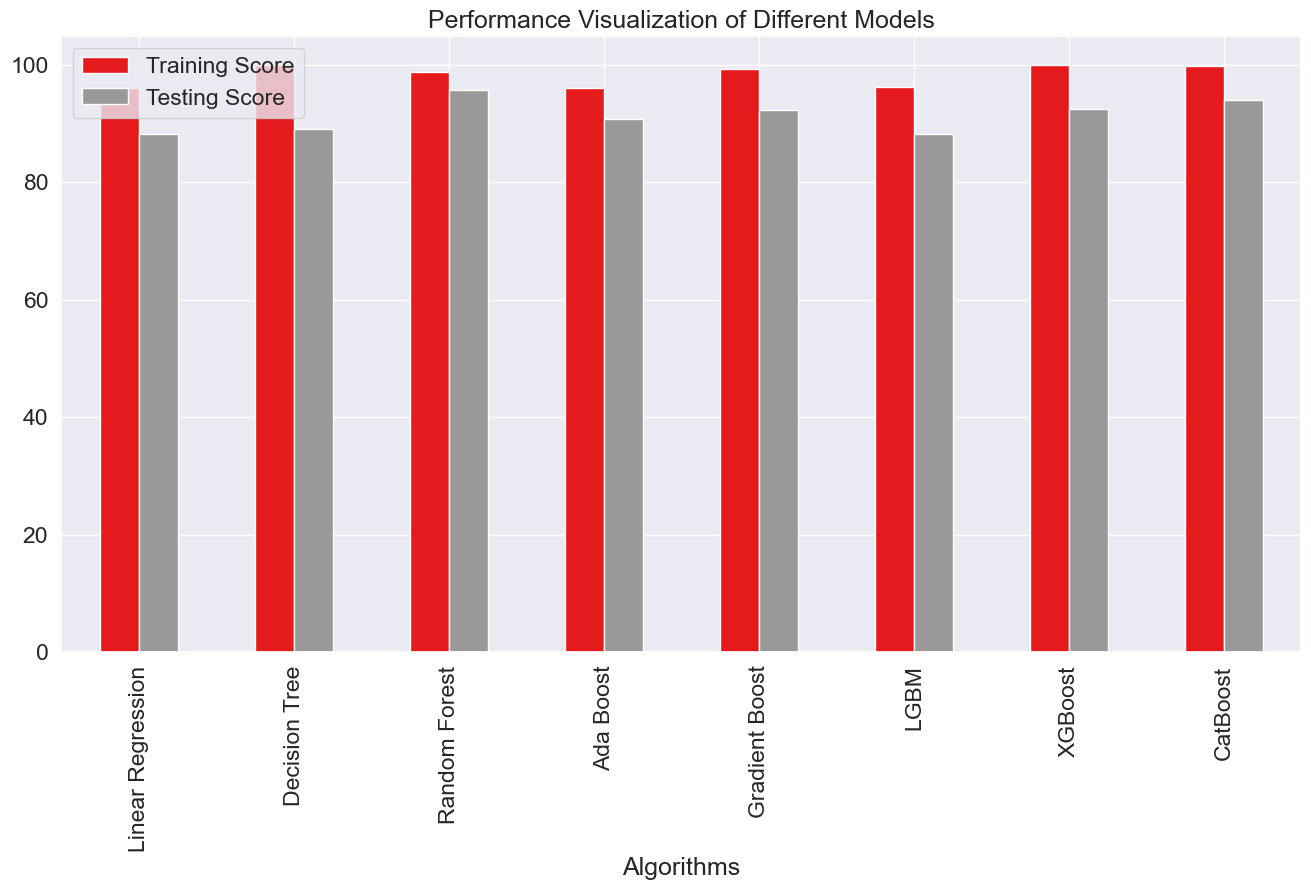

In [160]:
df.plot(x="Algorithms",y=["Training Score","Testing Score"], figsize=(16,8),kind="bar",
        title="Performance Visualization of Different Models",colormap="Set1")
plt.show()

## Observation
💡 Highest performance was give by Random Forest Model around 95%%.
💡 But catboost & XGBoost Model performance was also good.
💡 So we can use any of these three Models for predicting the price of car in future.

## Conclusion

## Car Price Prediction with Machine Learning.

Key-Points

💡 First we did the Basic Understanding of Data
💡 Then we performed Data Cleaning to make the raw data more useable while analysis.
💡 Then we performed Exploratory Data Analysis to generate insights from the data.
💡 Then we performed Data Preprocessing to make data suitable for model training & testing.
💡 Then we trainined our model using different Machine Learning Algorithms.
💡 In the end we came with 95% accuracy which was given by RandomForestRegression.So we can use this model for predicting price of a car in future.

## Next Steps for Improvement:
# Hyperparameter Tuning:

Use GridSearchCV or RandomizedSearchCV to fine-tune Random Forest, XGBoost, and CatBoost parameters to achieve better generalization.

 I just prioritized models that generally perform better in real-world regression tasks.

1. Linear Regression: No major hyperparameters	, Use Ridge/Lasso
2. Decision Tree: Overfits, better in ensembles	Tune it directly if needed
3. AdaBoost	: Weak learner-based, better options exist, 	Can still be tuned
4. Gradient Boosting: XGBoost, CatBoost, and LGBM are better

## 1. Hyperparameter Tuning Using GridSearchCV

In [161]:
# Define hyperparameter grids for each model
param_grid = {
    "Random Forest": {
        "n_estimators": [100, 200, 300],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5, 10]
    },
    "XGBoost": {
        "learning_rate": [0.01, 0.1, 0.2],
        "n_estimators": [100, 200, 300],
        "max_depth": [3, 5, 7]
    },
    "LGBM": {
        "learning_rate": [0.01, 0.1, 0.2],
        "n_estimators": [100, 200, 300],
        "num_leaves": [31, 40, 50]
    },
    "CatBoost": {
        "depth": [4, 6, 10],
        "iterations": [100, 200, 300],
        "learning_rate": [0.01, 0.1, 0.2]
    }
}

In [162]:
# Define models
models = {
    "Random Forest": RandomForestRegressor(),
    "XGBoost": XGBRegressor(),
    "LGBM": LGBMRegressor(),
    "CatBoost": CatBoostRegressor(verbose=0)
}

In [164]:
# Apply GridSearchCV to each model
best_models = {}
for name, model in models.items():
    print(f"Hyperparameter tuning for {name}...")
    grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring="r2", n_jobs=-1)
    grid_search.fit(x_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Best Parameters for {name}: {grid_search.best_params_}")
    print(f"Best R² Score: {grid_search.best_score_:.4f}\n")

Hyperparameter tuning for Random Forest...
Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best R² Score: 0.9173

Hyperparameter tuning for XGBoost...
Best Parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best R² Score: 0.9232

Hyperparameter tuning for LGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000962 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 304
[LightGBM] [Info] Number of data points in the train set: 164, number of used features: 24
[LightGBM] [Info] Start training from score 13223.414634
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

In [166]:
# Evaluate the best models on test data
for name, model in best_models.items():
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} Test R² Score: {r2:.4f}")

Random Forest Test R² Score: 0.9532
XGBoost Test R² Score: 0.9295
LGBM Test R² Score: 0.8865
CatBoost Test R² Score: 0.9394


## 2. Hyperparameter Tuning Using RandomizedSearchCV

Instead of searching all hyperparameter combinations (GridSearchCV), we can randomly sample to speed up the process.

In [168]:
# RandomizedSearchCV for Random Forest
rf_random = RandomizedSearchCV(
    estimator=RandomForestRegressor(),
    param_distributions=param_grid["Random Forest"],
    n_iter=10,  # Number of random combinations
    cv=5,
    scoring="r2",
    n_jobs=-1,
    random_state=42
)
rf_random.fit(x_train, y_train)
print(f"Best Random Forest Params: {rf_random.best_params_}")
print(f"Best R² Score: {rf_random.best_score_:.4f}")

Best Random Forest Params: {'n_estimators': 300, 'min_samples_split': 2, 'max_depth': 10}
Best R² Score: 0.9184


## 3. Compare Hyperparameter-Tuned Models

Now, you can visualize the performance of models after tuning:

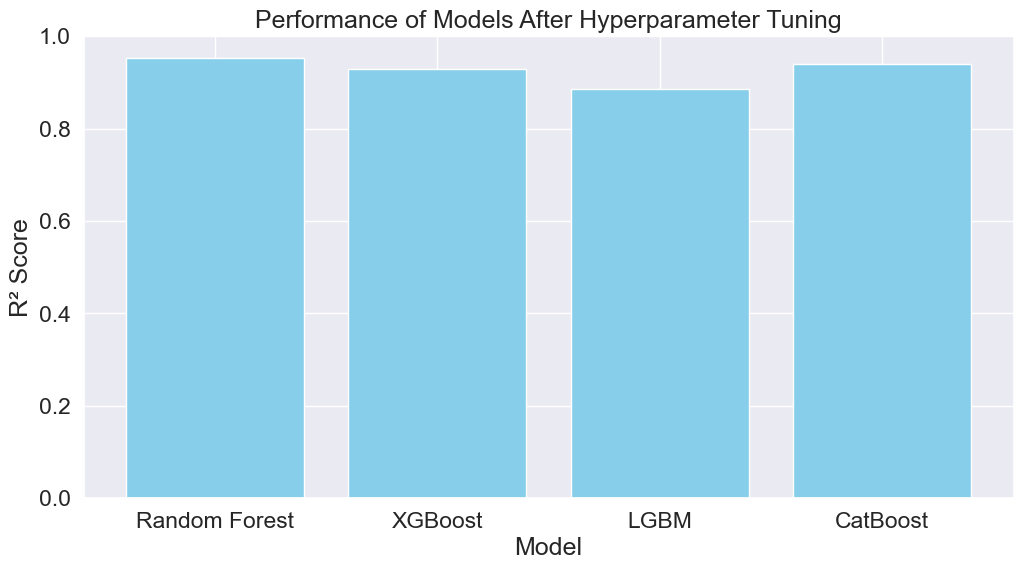

In [170]:
# Evaluate the models
models_after_tuning = {
    "Random Forest": rf_random.best_estimator_,
    "XGBoost": best_models["XGBoost"],
    "LGBM": best_models["LGBM"],
    "CatBoost": best_models["CatBoost"]
}

# Store scores
tuned_scores = {name: r2_score(y_test, model.predict(x_test)) for name, model in models_after_tuning.items()}

# Plot the performance
plt.figure(figsize=(12, 6))
plt.bar(tuned_scores.keys(), tuned_scores.values(), color="skyblue")
plt.xlabel("Model")
plt.ylabel("R² Score")
plt.title("Performance of Models After Hyperparameter Tuning")
plt.ylim(0, 1)
plt.show()

## Choose the Best Model

1. Based on R² scores, Random Forest, XGBoost, and CatBoost seem to be the best options.
2. Compare their performance on different metrics:

   Mean Absolute Error (MAE)
   Mean Squared Error (MSE)
   Root Mean Squared Error (RMSE)
   R² Score

In [174]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

for name, model in best_models.items():
    y_pred = model.predict(x_test)
    print(f"\n🔍 {name} Performance:")
    print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
    print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")


🔍 Random Forest Performance:
R² Score: 0.9532
MAE: 1350.3222
MSE: 3691278.8541
RMSE: 1921.2701

🔍 XGBoost Performance:
R² Score: 0.9295
MAE: 1702.1479
MSE: 5564385.8065
RMSE: 2358.8950

🔍 LGBM Performance:
R² Score: 0.8865
MAE: 1948.8671
MSE: 8958675.2073
RMSE: 2993.1046

🔍 CatBoost Performance:
R² Score: 0.9394
MAE: 1508.1554
MSE: 4783112.2565
RMSE: 2187.0328


## 🔍 Analysis of Results

1. Random Forest (R² = 0.9532) performed the best in terms of R² score and has the lowest error values.
2. CatBoost (R² = 0.9394) is also very close and performs well.
3. XGBoost (R² = 0.9295) is slightly lower than CatBoost.
4. LGBM (R² = 0.8865) has the lowest performance among the tuned models.


## From the above analysis of results, I am finalizing  Random Forest or CatBoost as best model.

In [175]:
import joblib
joblib.dump(best_models["Random Forest"], "car_price_prediction_model.pkl")

['car_price_prediction_model.pkl']

## 1️⃣ Feature Selection:

<BarContainer object of 10 artists>

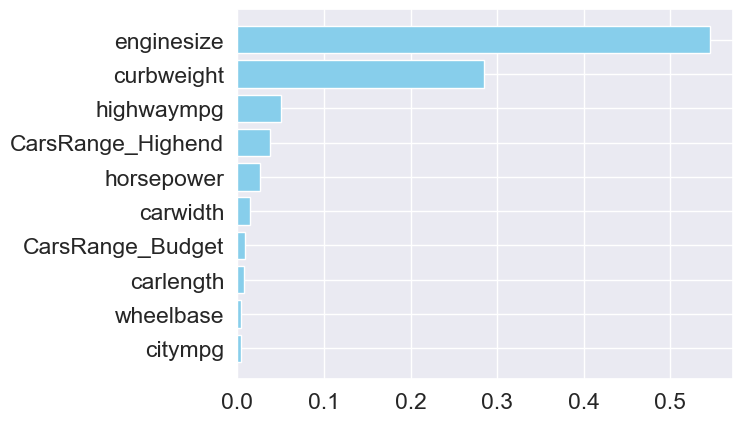

In [182]:
top_n = 10
top_features = sorted_idx[-top_n:]

plt.barh(np.array(feature_names)[top_features], feature_importance[top_features], color="skyblue")

## Predict on New Data (Real-world Testing)

In [189]:
new_data = pd.DataFrame({
    "fueltype": ["gas"],
    "aspiration": ["std"],
    "doornumber": ["four"],
    "carbody": ["sedan"],
    "drivewheel": ["fwd"],
    "enginetype": ["ohc"],
    "cylindernumber": ["four"],
    "fuelsystem": ["mpfi"],
    "wheelbase": [102.0],
    "carlength": [178.0],
    "carwidth": [66.0],
    "curbweight": [2500],
    "enginesize": [130],
    "boreratio": [3.15],
    "horsepower": [110],
    "citympg": [25],
    "highwaympg": [32],
    "CarsRange": ["Medium"]
})

# Encode categorical variables (if necessary)
new_data = pd.get_dummies(new_data)  # Ensure the same encoding as training data

# Align columns with trained model
new_data = new_data.reindex(columns=x_train.columns, fill_value=0)

# Use the best-performing model to predict price
best_model = best_models["Random Forest"]  # Change to your best model
predicted_price = best_model.predict(new_data)

print(f"Predicted Car Price: ${predicted_price[0]:.2f}")

Predicted Car Price: $34308.81


## Steps to Test the Model

## 1️. Load the Saved Model
First, load the model using joblib.load()

In [190]:
# Load the trained model
model = joblib.load("car_price_prediction_model.pkl")

## 2️. Prepare the Test Data
Make sure your input data has the same features and structure as your training data:

In [191]:
new_data = pd.DataFrame({
    "fueltype": ["gas"], 
    "aspiration": ["std"], 
    "doornumber": ["four"], 
    "carbody": ["sedan"], 
    "drivewheel": ["fwd"], 
    "enginetype": ["ohc"], 
    "cylindernumber": ["four"], 
    "fuelsystem": ["mpfi"],
    "wheelbase": [88.6], 
    "carlength": [168.8], 
    "carwidth": [64.1], 
    "curbweight": [2548], 
    "enginesize": [130], 
    "boreratio": [3.47], 
    "horsepower": [111], 
    "citympg": [21], 
    "highwaympg": [27], 
    "CarsRange": ["Budget"]  # Ensure this matches the training dataset
})

## 3️. Apply the Same Preprocessing (if needed)

In [192]:
new_data = pd.get_dummies(new_data)  # Convert categorical to numerical

## 4️. Ensure Columns Match the Training Data

In [ ]:
# Get feature names from training data
trained_columns = x_train.columns  #  x_train was used for model training

# Reorder and fill missing columns with 0
new_data = new_data.reindex(columns=trained_columns, fill_value=0)

## 5. Make Predictions

In [196]:
predicted_price = model.predict(new_data)

print(f"Predicted Car Price: ${predicted_price[0]:,.2f}")

Predicted Car Price: $34,308.81
